<a href="https://colab.research.google.com/github/DFerere/Proyecto-Final-Data-Science/blob/main/ProuectoFinal_DataScience_David_Ferere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **OFERTAS DE TRABAJO FRAUDULENTAS**

El fraude en el mundo contemporaneo ha significado un enorme reto para las organizaciones y gobiernos, en su totalidad todas las formas de fraude tienen como vector de ataque la suplantaciòn de identidad y el robo de data sensible, con este fin lograr consumar la subtracción de activos y valores, a traves de la extorsiòn, accesos no autorizados y amenazas a la reputaciòn.

Lo anterior expone el problema de nuestro siguiente caso de estudio, en donde descargamos un Dataset de Kaggle (https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction) relacionado con el recogimiento de datos de ofertas de trabajos legitimas y fraudulentas, el cual nos proponemos analizar de forma de entender y ubicar los distintos patrones que pueden contribuir significativamente a la identificaciòn de un fraude en el mercado laboral, y estudiar los distintos modelos de aprendizaje que mejor se ajusten a la predicciòn e identificaciòn de dichos patrones. 

Con nuestro analisis exploratorio determinamos que variables de nuestro dataset pueden ser determinantes para identificar una oferta fraudulenta, una de ella, por ejemplo, es el campo indica si la oferta laboral tiene logo de la compañia contratante o no, el cual, a traves de un decision tree, queda comprobado que es el campo con mayor peso.

Nuestro analisis cuenta con la siguiente estructura: 

1. IMPORTACIÓN DEL DATASET

2. ABSTRACTO

3. DATA WRANGLING

  3.1 Limpieza de valores nulos (Apply)

  3.2 Agrupación (Groupby)

4. EXPLORACIÓN DEL DATASET

  4.1 Estructura del Dataset

  4.2 Tipos de datos del Dataset

  4.3 Clasificación de los datos

  4.4 Analisis de los campos del Dataset
  
5. VISUALIZACIONES
  
  5.1 Analisis de los sectores de la industria

    a) Ofertas fraudulentas

    b) Ofertas legitimas

  5.2 Analisis de los campos de Educación y  Experdiencia Requerida
    5.1.1 Experiencia Requerida
     
     a) Fraudulentas

     b) Legitimas

     c) Visualización de las experiencias y educación requerida por tipo de oferta laboral

    5.1.2 Educación

     a) Ofertas fraudulentas

     b) Ofertas legitimas

    5.1.3 Analisis de los salarios por tipo de oferta laboral

     a) Ofertas fraudulentas

     b) Ofertas legitimas

     c) Conclusión Analisis de salarios

6. ESTUDIO DE HIPOTESIS

  6.1 HIPOTESIS 1

  6.2 HIPOTESIS 2

  6.3 HIPOTESIS 3

7. FEATURE ENGINEERING

  7.1 CONSIDERACIONES

  7.2 OVERSAMPLING

  7.3 DATA SPLITTING

  7.4 FEATURE SELECTION

    7.4.1 Forward Selection

    7.4.2 Backward Selection

    7.4.3 Stepwise Regression

8. ANALISIS DE MODELOS DE MACHINE LEARNING

  8.1 KNN (N Vecinos Cercanos)

  8.2 Random Forest Clasificación

  8.3 Decision Tree

9. Consideraciones Finales de los Modelos de Clasificación


# **IMPORTACIÓN DEL DATASET**

Como primer paso importamos el Dataset desde el portal de Kaggle, para ello descargamos adicionalmente las librerias numpy, pandas, matploiylib y seaborn, correspondiente a la manipulaciones, analisis y visualizaciòn de datos. 


In [ ]:
#Importamos librerias necesarias para la ejecución del Notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# url del Dataset ---> https://docs.google.com/spreadsheets/d/e/2PACX-1vSR1Hlhn7qgmt83mZ-OHqqojywxfnkHbe7POaROmlmKz7HXepHphx7vaBgt00XLc6sLRiOzGH2Mbc-o/pub?output=csv
sheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSR1Hlhn7qgmt83mZ-OHqqojywxfnkHbe7POaROmlmKz7HXepHphx7vaBgt00XLc6sLRiOzGH2Mbc-o/pub?output=csv'
df = pd.read_csv(sheet_url)
df.head(4) #Muestra del Dataset

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0


**PROYECTO REAL / FAKE JOBS** - David Ferere

# **ABSTRACTO**

En esta secciòn describimos los hallazgos del dataset importado, cual es el objetivo del dataset segùn la fuente, y una breve explicación de cada uno de los campos que componen al Dataset. 

Fuente del Dataset: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

Este conjunto de datos contiene 18 000 descripciones de ofertas de puestos de trabajo, de las cuales unas 800 son fraudulentas. Los datos consisten tanto en información textual como en metainformación (Localización) sobre los trabajos. El conjunto de datos se puede utilizar para crear modelos de clasificación que pueden aprender las descripciones de trabajo que son fraudulentas.

Las columnas representas los datos textuales o metadatos de cada oferta, y consisten en lo siguiente:

**Title**: Titulo del trabajo.

**Location**: Ubicación en USA.

**Departament**: Departamento al que pertenece la oferta laboral.

**CompanyProfile**: Perdil de la Compañia.

**Descripción**: Descripción de la oferta.

**Requirements**: Requerimientos o perfil del empleado.

**Benefits**: Beneficios de la oferta.

**telecomunicating**: Existe comunicación a distancia con el ofertante. 

**has_company_logo**: La compañia tiene logo.

**has_questions**: Hace preguntas el proceso de oferta laboral.

**Industry**: Sector de la industria a la que pertenece al compañia que hace la oferta.

**function**: Función del negocio que cumple la compañia.

**employment_type**: Tipo de empleo.

**required_experience**: Experiencia solicitada para el cargo.

**fraudulent**: Es fraudulenta la oferta (Si: 1, No: 0)

El objetivo del presente Dataset es poder extraer los features mas relevantes para la identificación de una oferta de trabajo fraudulenta, este analisis perimitira el desarrollo de un Modelo Predictivo de ofertas reales o fraudulentas. Su mercado de aplicación esta enfocado en redes sociales de trabajo y profesionales, donde a traves de ofertas maliciosas se busca estafar a los usuarios y extraer, si es posible, información personal de los mismos.

#**DATA WRANGLING**

En esta sección de arreglos de datos procedemos a analizar para ciertos campos la composición de datos nulos y la identificación de categorias. Estos analisis se logran a traves de funciones como apply y groupby. 

##Limpieza de valores nulos (Apply)

In [ ]:
import pandas as pd #importamos libreria pandas

def rem_null(x): #creamos función que limpia de una columna los valores nulos
  return x.dropna() #función dropna de pandas que limpia valores nulos

salary = df["salary_range"] #extraemos la columna salario 
df_salary = pd.DataFrame(salary) #la convertimos en un dataframe
df1_app = df_salary.apply(rem_null) #aplicamos lo función rem_null a traves de apply
df1_app.head(15)

,salary_range
6,20000-28000
10,100000-120000
15,120000-150000
23,100000-120000
31,50000-65000
42,40000-50000
65,60-80
76,65000-70000
77,75-115
79,75000-110000


In [ ]:
df1_app.shape #observamos que el campo salary cuento con solo 2868 valores no nulos

(2868, 1)

In [ ]:
import plotly.express as px
fig = px.pie(values = [2868, 15012],
             names = ['Salario', 'No salario'],
             color = ['Salario', 'No salario'],
             hole = 0.5,
             title = 'Registros que indican y no el rango de salario')
fig.show()
#esto representa apenas un 16% del universo de registros, lo cual significa que el 84% de los registros tienen a salary como campo nulo

Bajo el analisis anterior podemos determinar que el campo salary no es un parametro de mucho valor en el desarrollo de nuesto modelo de aprendizaje de ofertas laborales fraudulentas, debido a que el 80% de los registros contienen valores nulos.

##Agrupación (Groupby)

A traves de la agrupación logramos categorizar nuestros datos, de manera de entender los distintos grupos y tipologias que conforma al Dataset y a su vez observar cuanto peso otorga cada categoria en la determinación de la legitimidad de una oferta laboral. 

In [ ]:
department = df["department"] #extraemos el campo department 
df_dp = pd.DataFrame(department)
df1_dp = df_dp.apply(rem_null) #aplicamos la función rem_null para extraer los valores nulos
df1_dp.head(15)

,department
0,Marketing
1,Success
3,Sales
6,ANDROIDPIT
11,HR
14,Sales
15,Sales
16,R&D
22,Engagement
23,Businessfriend.com


In [ ]:
df1_dp.shape #observamos que un 30% de los registros cuentan con este campo "department"como no nulo

(6327, 1)

In [ ]:
gk = df1_dp.value_counts('department') #contamos el numero de registros por cada tipo de departamento
pd.DataFrame(gk)

,0
department,
Sales,564
Engineering,505
Marketing,418
Operations,275
IT,229
...,...
Greetsnap Development,1
Grocery Stores,1
H3rt,1


In [ ]:

gk2 = df.groupby(['job_id','department'])['department'].count().reset_index(name="count").value_counts('department')
#agrupamos el dataset segun el tipo de departamento de la oferta laboral, y contamos los registros por cada tipo
gk_pd = pd.DataFrame(gk2) #convertimos en un dataset
gk_pd = gk_pd.reset_index() #reseteamos el campo indice para dar mejor organización al dataframe
gk_pd.columns = ['departamento', 'conteo'] #asignamos nombre a cada columna
gk_pd_top = gk_pd.head(10)
gk_pd_top #observamos los 10 departamentos que mas aparecen en el dataset de ofertas laborales


,departamento,conteo
0,Sales,564
1,Engineering,505
2,Marketing,418
3,Operations,275
4,IT,229
5,Development,153
6,Product,113
7,Information Technology,100
8,Technology,79
9,Design,79


In [ ]:
#Realizamos un  Treemap para observar la población de registros de ofertas laborales por tipo de departamento
import matplotlib.pyplot as plt

fig = px.treemap(gk_pd_top, path=[px.Constant("Ofertas Laborales por Departamento"), 'departamento'], values='conteo')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Del Treemap anterior podemos observar que el mayor numeros de registros de ofertas laborales pertenecen al departamento de ventas (sales), seguidos por ingenieria (engineering) y marketing. 

Text(0, 0.5, 'Tipo de departamento')

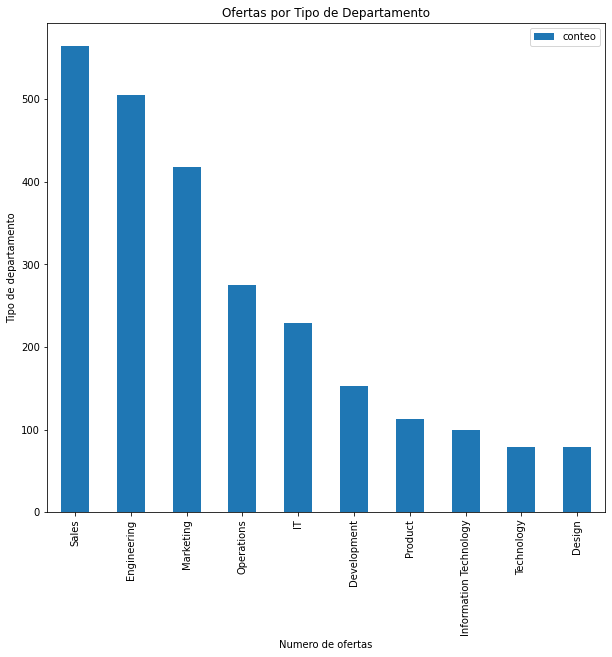

In [ ]:
import matplotlib.pyplot as mp
from matplotlib import pyplot as plt #importamos libreria metaplotlib para graficar
gk_pd_top.plot(x="departamento", y="conteo", kind="bar", figsize=(10, 9)) #graficamos dataset del top 10 departamentos
plt.title("Ofertas por Tipo de Departamento") #titulo del grafico
plt.xlabel("Numero de ofertas") #nombre de etiqueta eje horizontal
plt.ylabel("Tipo de departamento") #nombre de etiqueta eje vertical
#mostramos grafico de barras de los top 10 departamentos presentes en el dataset de ofertas laborales

In [ ]:
gk_pd.sort_values(by="conteo", ascending=False).head(10) #usamos función sort_values para corroborar los resultados anteriores

,departamento,conteo
0,Sales,564
1,Engineering,505
2,Marketing,418
3,Operations,275
4,IT,229
5,Development,153
6,Product,113
7,Information Technology,100
8,Technology,79
9,Design,79


Para el caso del campo department podemos tomar mas consideraciones debido a que cuenta con un porcentaje mayor de registros con valores no nulos, sin embargo, sigue siendo menos del 50%. Para este caso se puede deducir que las areas de mayor presencia en el dataset son las administrativas, tecnologia y diseño, pero no nos llevan a ser concluyentes sobre su legitimidad. 

# **EXPLORACIÓN DEL DATASET**

Esta sección estudiamos la estructura y morfologia del Dataset, el numero de registros, campos, tipos de datos, clasificación y un analisis resumido de lo encontrado. En terminos generales nuestro Dataset cuenta en su mayoria con tipos de datos objetos, que visualmente son pequeñas descripciones en texto de cada registro para los distintos campos, seguido por tipos de datos numericos, principalmente de forma binaria, para indicar si en un registro especifico en ese campo es TRUE o FALSE.

##Estructura del Dataset

In [ ]:
#Estructura del Dataset
df.shape

(17880, 18)

El dataset cuenta con 17880 filas y 18 columnas

##Tipos de datos del Dataset

In [ ]:
df.dtypes #Tipos de datos de cada columna

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

Podemos observar que la mayoria de los campos en el dataset son tipo objeto, seguido por valores numericos enteros, estos valores numericos son binarios (1, 0)

In [ ]:
df.isna().sum() #cantidad de valores nulos por campo

job_id                     0
title                      0
location                 346
department             11553
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Podemos observar que el campo con mayor valores nulos es Salary_range de 15012, es decir, si la oferta laboral especifica el pago a ofrecer, mientras el titulo del trabajo, por su parte los campos descripción, comunicación remota, logo, preguntas y el flag de fraudelento tienen 0 (cero) valores nulos. Es importantes destacar que nuestro campo objetivo en primera fase es el fraudulent flag (campo de etiquetado), el cual, nos va a permitir entender que features debemos tomar en cuenta para analizar una oferta laboral como maliciosa o legitima. 

##Clasificación de los datos

In [ ]:
legitimo = df.loc[df['fraudulent'] == 0] #Deseo observar el numero de ofertas fraudulentas y no fraudulentas que tiene el dataset seleccionado
legitimo.shape

(17014, 18)

Observamos que 17014 ofertas de trabajo son legitimas

In [ ]:
fraude = df.loc[df['fraudulent'] == 1] #Deseo observar el numero de ofertas fraudulentas y no fraudulentas que tiene el dataset seleccionado
fraude.shape

(866, 18)

##Analisis de los campos del Dataset

Observamos que 866 ofertas de trabajo son no legitimas

In [ ]:
# Declaramos los datos
data = [17014, 866] #definimos los valores
keys = ['Legitimas', 'Fraude'] #definimos los grupos

import plotly.express as px

fig = px.pie(values = [17014, 866],
             names = ['Legitimas', 'Fraude'],
             title = 'Ofertas fraudulentas vs Ofertas Legitimas')

fig.show()



Observamos que el 95% de las ofertas en nuestro dataset son legitimas, mientras el 5% son fraudulentas

**Evaluación de la locación**
En esta sección podemos asumir una primera hipotesis, realcionada a si los ofertas laborales segun su legitimidad se detalla el lugar de origen de la misma. 

In [ ]:
#definimos una nueva columna para establecer como valor binario la existencia de una ubicación geografica en la oferta laboral
df2 = df
df2['tiene_locacion'] = np.where(df2['location'].isnull(), 0, 1)

df2.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,tiene_locacion
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1


In [ ]:
legitimo_locacion = df2.loc[(df2['tiene_locacion'] == 1) & (df2['fraudulent'] == 0)] #Deseo observar el numero de ofertas no fraudulentas que especifican la locación
legitimo_locacion.shape

(16687, 19)

In [ ]:
fraudulento_locacion = df2.loc[(df2['tiene_locacion'] == 1) & (df2['fraudulent'] == 1)] #Deseo observar el numero de ofertas fraudulentas que especifican la locación
fraudulento_locacion.shape

(847, 19)

In [ ]:
import plotly.express as px

fig = px.pie(values = [847, 19], #Definimos los valores
             names = ['Locación', 'No locación'], #Definimos los grupos
             color = ['Locación', 'No locación'],
             title = 'Ofertas fraudulentas con Locación y Sin Locación',
             hole = 0.5)

fig.show()

In [ ]:
import plotly.express as px

fig = px.pie(values = [16687, 327], #Declaramos los datos
             names = ['Locación', 'No locación'], #Definimos los grupos
             color = ['Locación', 'No locación'],
             title = 'Ofertas no fraudulentas con Locación y Sin Locación',
             hole = 0.5)

fig.show()


De los dos graficos de anillos anteriores podemos observar que mas del 90% de las ofertas laborales cuentan con una locación, independientemente que sean legitimas o fraudulentas. 

In [ ]:
location_p = legitimo_locacion["location"] #extraemos el campo locación
df_dp_p = pd.DataFrame(location_p)
df1_dp_p = df_dp_p.apply(rem_null) #aplicamos la función rem_null para extraer los valores nulos
df1_dp_p.head(15)

,location
0,"US, NY, New York"
1,"NZ, , Auckland"
2,"US, IA, Wever"
3,"US, DC, Washington"
4,"US, FL, Fort Worth"
5,"US, MD,"
6,"DE, BE, Berlin"
7,"US, CA, San Francisco"
8,"US, FL, Pensacola"
9,"US, AZ, Phoenix"


In [ ]:
gk_p = df1_dp_p.value_counts('location') #contamos el numero de registros por cada locacion
pd.DataFrame(gk_p)

,0
location,
"GB, LND, London",716
"US, NY, New York",638
"GR, I, Athens",464
"US, CA, San Francisco",461
"US, ,",311
...,...
"US, IL, Cicero",1
"US, IL, Chicago, IL 60606, US",1
"US, IL, Chicago Northwest",1


In [ ]:
gk2_p = legitimo_locacion.groupby(['job_id','location'])['location'].count().reset_index(name="count").value_counts('location')
#agrupamos el dataset segun el tipo de departamento de la oferta laboral, y contamos los registros por cada tipo
gk_pd_p = pd.DataFrame(gk2_p) #convertimos en un dataset
gk_pd_p = gk_pd_p.reset_index() #reseteamos el campo indice para dar mejor organización al dataframe
gk_pd_p.columns = ['locacion', 'conteo'] #asignamos nombre a cada columna
gk_pd_top_p = gk_pd_p.head(10)
gk_pd_top_p #observamos las 10 locaciones que mas aparecen en el dataset de ofertas laborales

,locacion,conteo
0,"GB, LND, London",716
1,"US, NY, New York",638
2,"GR, I, Athens",464
3,"US, CA, San Francisco",461
4,"US, ,",311
5,"US, IL, Chicago",251
6,"US, DC, Washington",249
7,"DE, BE, Berlin",221
8,"NZ, N, Auckland",218
9,"GB, , London",178


In [ ]:
#Realizamos un  Treemap para observar la población de registros de ofertas laborales por locacion
import matplotlib.pyplot as plt

fig = px.treemap(gk_pd_top_p, path=[px.Constant("Ofertas Laborales Legitimas por Locación"), 'locacion'], values='conteo')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Del grafico Treemap anterior podemos observar que las 4 principales localizaciones en la que se distribuyen las ofertas laborales legitimas son Londres, Nueva York, Atenas y San Francisco. 

In [ ]:
location_p_2 = fraudulento_locacion["location"] #extraemos el campo locación
df_dp_p_2 = pd.DataFrame(location_p_2)
df1_dp_p_2 = df_dp_p_2.apply(rem_null) #aplicamos la función rem_null para extraer los valores nulos
df1_dp_p_2.head(15)

,location
98,"US, , Stocton, CA"
173,US
180,"PK, SD, Karachi"
215,"US, CA, Bakersfield, CA / Mt. Poso"
357,"US, IL, hazelcrest"
493,"US, CA, Los Angeles"
537,"US, OH,"
573,"US, CA, San Jose"
584,"US, FL,"
603,"US, TX, Houston"


In [ ]:
gk_p_2 = df1_dp_p_2.value_counts('location') #contamos el numero de registros por cada locacion
pd.DataFrame(gk_p_2)

,0
location,
"US, TX, Houston",92
"AU, NSW, Sydney",31
"US, ,",28
"US, CA, Bakersfield",24
"US, CA, Los Angeles",23
...,...
"US, IL, ATKINSON",1
"US, ID, Pocatello",1
"US, ID, Aberdeen",1


In [ ]:
gk2_p_2 = fraudulento_locacion.groupby(['job_id','location'])['location'].count().reset_index(name="count").value_counts('location')
#agrupamos el dataset segun el tipo de departamento de la oferta laboral, y contamos los registros por cada tipo
gk_pd_p_2 = pd.DataFrame(gk2_p_2) #convertimos en un dataset
gk_pd_p_2 = gk_pd_p_2.reset_index() #reseteamos el campo indice para dar mejor organización al dataframe
gk_pd_p_2.columns = ['locacion', 'conteo'] #asignamos nombre a cada columna
gk_pd_top_p_2 = gk_pd_p_2.head(10)
gk_pd_top_p_2 #observamos las 10 locaciones que mas aparecen en el dataset de ofertas laborales

,locacion,conteo
0,"US, TX, Houston",92
1,"AU, NSW, Sydney",31
2,"US, ,",28
3,"US, CA, Bakersfield",24
4,"US, CA, Los Angeles",23
5,"US, CA, San Mateo",22
6,"US, NY, New York",20
7,"US, TX, AUSTIN",14
8,"US, CA, San Jose",14
9,"US, TX, DALLAS",12


In [ ]:
#Realizamos un  Treemap para observar la población de registros de ofertas laborales por locacion
import matplotlib.pyplot as plt

fig = px.treemap(gk_pd_top_p_2, path=[px.Constant("Ofertas Laborales Fraudulentas por Locación"), 'locacion'], values='conteo')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Para el caso de las ofertas laborales fraudulentas las dos localizaciones con mas presencia son Houston y Sydney.

De las dos graficas anteriores podemos concluir que la existencia del campo location no representa un indicador de importancia para determinar la legitimidad de una oferta de trabajo, debido a que en ambos caso (fraudulentas y legitimas) el 98% cuenta con un valor no nulo en este feature. 

# **VISUALIZACIONES**

Las visualizaciones nos ayudan a comprender de forma mas dinamica y con una visión mas de alto nivel las caracteristicas de nuestro Dataset, asi como formular posibles hipotesis para siguientes secciones. 

Para esta secciónn extraemos campos especificos a estudiar, como los sectores de la indutria, eduación y experiencia requerida y lo rangos de salarios ofrecidos. Para el primer campo las ofertas fraudulentas se enfocan en mercados de areas administrativas, asi mismo este tipo de ofertas buscan acercarse a la población con menor formación educativa y experiencia laboral. 

##**Analisis de los sectores de la industria**

En esta sección se analizara y visualizara los mercados que mas aparecen en las ofertas laborales y si esta nos puede dar indicios sobre la legitimidad o no de una oferta laboral. 

### **a) Ofertas fraudulentas**

In [ ]:
#Queremos analizar que sectores industriales aparecen en las ofertas laborales fraudulentas
#Para ello eliminamos los valores nulos del campo industry
industry2 = fraude["industry"]
fraude_industry = industry2.dropna()
fraude_industry

98                              Oil & Energy
173      Electrical/Electronic Manufacturing
215                             Oil & Energy
357                               Automotive
493                        Computer Software
                        ...                 
17819                 Hospital & Health Care
17820                       Executive Office
17823                Staffing and Recruiting
17826                 Hospital & Health Care
17830                      Apparel & Fashion
Name: industry, Length: 591, dtype: object

In [ ]:
#Luego convertimos los valores no nulos del campo industry a un nuevo dataframe para facilitar su graficación
df_fraude_industry = pd.DataFrame({'id':fraude_industry.index, 'industry':fraude_industry.values})
group_fraude_industry = df_fraude_industry.groupby("industry")
count_fraude_industry = group_fraude_industry.count()
count_fraude_industry

,id
industry,
Accounting,57
Airlines/Aviation,1
Animation,2
Apparel & Fashion,2
Automotive,5
...,...
Telecommunications,26
Transportation/Trucking/Railroad,3
Utilities,1


In [ ]:
#Luego del Dataframe anterior nos traemos los 10 sectores industriales que mas aparecen
most_fraude_industry = df_fraude_industry['industry'].value_counts()[:10]
df_fraude_industry2 = pd.DataFrame({'industry':most_fraude_industry.index, 'frecuency':most_fraude_industry.values})
df_fraude_industry2

,industry,frecuency
0,Oil & Energy,109
1,Accounting,57
2,Hospital & Health Care,51
3,Marketing and Advertising,45
4,Financial Services,35
5,Information Technology and Services,32
6,Telecommunications,26
7,Real Estate,24
8,Consumer Services,24
9,"Leisure, Travel & Tourism",21


Text(0.5, 0, 'Industria')

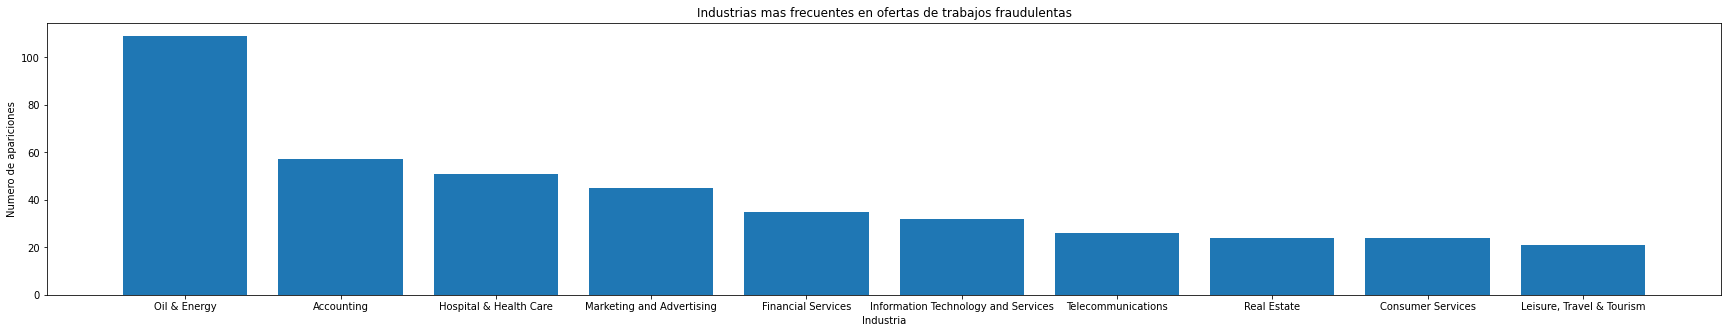

In [ ]:
#Graficamos histograma de sectores del mercado laboral que mas aparecen en las ofertas de trabajo fraudulentas haciendo uso de la libreria Matploit
fig, ax = plt.subplots(figsize=(30,5))
#Definimos datos del histograma
ax.bar(df_fraude_industry2.industry, df_fraude_industry2.frecuency)
#Definimos titulo del histograma
ax.set_title('Industrias mas frecuentes en ofertas de trabajos fraudulentas')
#Definimos nombre de los ejes del histograma
ax.set_ylabel('Numero de apariciones')
ax.set_xlabel('Industria')

Para el caso de las ofertas fraudulentas podemos observar que la industria de la energia, contabilidadad, salud y marketing son las que encabezan las lista de apariciones. 

### **b) Ofertas legitimas**

In [ ]:
#Queremos analizar que sectores industriales aparecen en las ofertas laborales legitimas
#Para ello eliminamos los valores nulos del campo industry
industry3 = legitimo["industry"]
legitimo_industry = industry3.dropna()
legitimo_industry

1                  Marketing and Advertising
3                          Computer Software
4                     Hospital & Health Care
6                               Online Media
8        Information Technology and Services
                        ...                 
17874                      Computer Software
17875                      Computer Software
17876                               Internet
17878                         Graphic Design
17879                      Computer Software
Name: industry, Length: 12386, dtype: object

In [ ]:
#Luego convertimos los valores no nulos del campo industry a un nuevo dataframe para facilitar su graficación
df_legitimo_industry = pd.DataFrame({'id':legitimo_industry.index, 'industry':legitimo_industry.values})
group_legitimo_industry = df_legitimo_industry.groupby("industry")
count_legitimo_industry = group_legitimo_industry.count()
count_legitimo_industry

,id
industry,
Accounting,102
Airlines/Aviation,62
Alternative Dispute Resolution,1
Animation,3
Apparel & Fashion,95
...,...
Warehousing,50
Wholesale,10
Wine and Spirits,1


In [ ]:
#Luego del Dataframe anterior nos traemos los 10 sectores industriales que mas aparecen
most_legitimo_industry = df_legitimo_industry['industry'].value_counts()[:10]
df_legitimo_industry2 = pd.DataFrame({'industry':most_legitimo_industry.index, 'frecuency':most_legitimo_industry.values})
df_legitimo_industry2

,industry,frecuency
0,Information Technology and Services,1702
1,Computer Software,1371
2,Internet,1062
3,Education Management,822
4,Marketing and Advertising,783
5,Financial Services,744
6,Hospital & Health Care,446
7,Consumer Services,334
8,Telecommunications,316
9,Retail,218


Text(0.5, 0, 'Industria')

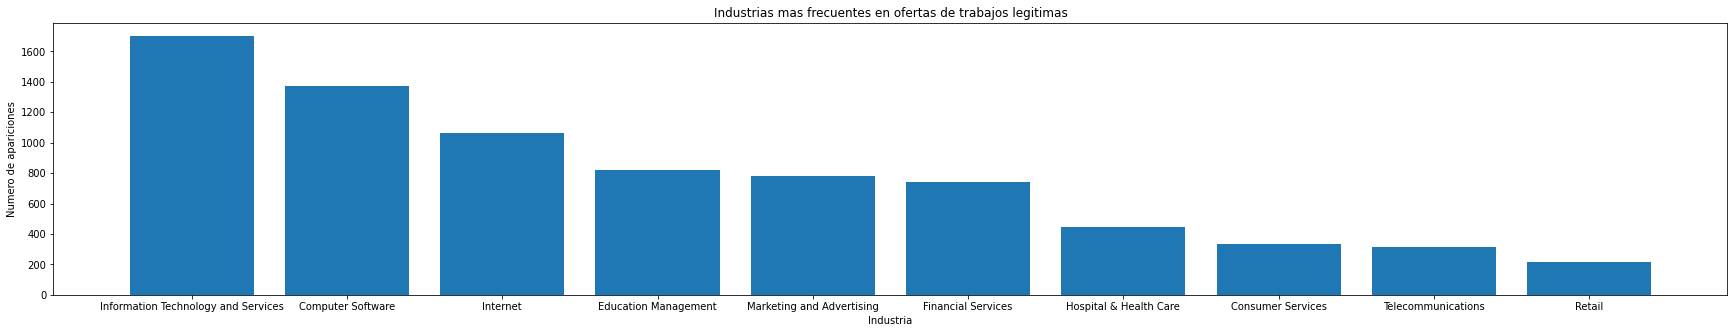

In [ ]:
#Graficamos histograma de sectores del mercado laboral que mas aparecen en las ofertas de trabajo fraudulentas haciendo uso de la libreria Matploit
fig, ax = plt.subplots(figsize=(30,5))
#Definimos datos del histograma
ax.bar(df_legitimo_industry2.industry, df_legitimo_industry2.frecuency)
#Definimos titulo del histograma
ax.set_title('Industrias mas frecuentes en ofertas de trabajos legitimas')
#Definimos nombre de los ejes del histograma
ax.set_ylabel('Numero de apariciones')
ax.set_xlabel('Industria')

De la grafica anterior podemos observar que para el caso de las ofertas legimitimas las top 4 industrias con mas apariciones son servicios de tecnologia, computación, internet y gestión de la educación. 

In [ ]:
mergedStuff = pd.merge(df_legitimo_industry2, df_fraude_industry2, on=['industry'], how='inner')
mergedStuff.head() #Queremos observar que sectores del top 10 hacen match entre los dos tipos de ofertas laborales

,industry,frecuency_x,frecuency_y
0,Information Technology and Services,1702,32
1,Marketing and Advertising,783,45
2,Financial Services,744,35
3,Hospital & Health Care,446,51
4,Consumer Services,334,24


Del dataframe anterior se observa que los sectores de tecnologia, marketing, finanzas, salud y consumo son los que aparecen en la lista de los top 10 sectores para cada tipo de oferta laboral. Esto puede indicarnos que suelen ser los sectores mas relevantes dentro de la economia mundial, por lo tanto van a concentrar el mayor numero de ofertas laborales, tanto legitimas como fraudulentas. 

En conclusion, podemos notar un contraste entre las industrias que mas aparecen para cada tipo de oferta laboral, las legitimas enfocadas areas de trabajo muy demandadas como es la tecnologia, en caso de las fraudulentas enfocadas en areas menos demandadas como la de energia y las administrativas. Se puede inferir que este puede un aspecto importante a estudiar, mas no absoluto, para determinar la legitimidad de una oferta laboral. 

## **Analisis de los campos de Educación y Experiencia Requerida**

**Relación de la experiencia y educación requerida con el nivel educativo requerido expuesto en las ofertas de trabajo fraudulentas**

###**Experiencia Requerida**

####**a) Fraudulentas**

In [ ]:
#Agrupamos los tipos de experiencia de trabajo que solicitan las ofertas fraudulentas
experiencia_fraude = fraude.required_experience
#Contamos cada tipo de experiencia 
count_experiencia_fraude = experiencia_fraude.value_counts()
#Los tranformamos a un nuevo Dataframe para facilitar mas adelante sus graficación
dfexperiencia_fraude = pd.DataFrame({'experiencia_requerida':count_experiencia_fraude.index, 'frecuencia':count_experiencia_fraude.values})
dfexperiencia_fraude

,experiencia_requerida,frecuencia
0,Entry level,179
1,Mid-Senior level,113
2,Not Applicable,60
3,Associate,42
4,Director,17
5,Executive,10
6,Internship,10


In [ ]:
#Realizamos un  Treemap para observar la población de registros de ofertas laborales fraudulentas por nivel de educacion requerida
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.treemap(dfexperiencia_fraude, path=[px.Constant("Ofertas Laborales fraudulentas por nivel de experiencia requerida"), 'experiencia_requerida'], values='frecuencia')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
#Agrupamos los tipos de nivel educativo que solicitan las ofertas fraudulentas
educacion_fraude = fraude.required_education
#Contamos cada tipo de experiencia
count_educacion_fraude = educacion_fraude.value_counts()
#Los tranformamos a un nuevo Dataframe para facilitar mas adelante sus graficación
dfeducacion_fraude = pd.DataFrame({'educacion_requerida':count_educacion_fraude.index, 'frecuencia':count_educacion_fraude.values})
dfeducacion_fraude

,educacion_requerida,frecuencia
0,High School or equivalent,170
1,Bachelor's Degree,100
2,Unspecified,61
3,Master's Degree,31
4,Some High School Coursework,20
5,Certification,19
6,Associate Degree,6
7,Professional,4
8,Some College Coursework Completed,3
9,Doctorate,1


In [ ]:
#Realizamos un  Treemap para observar la población de registros de ofertas laborales fraudulentas por nivel de educacion requerida
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.treemap(dfeducacion_fraude, path=[px.Constant("Ofertas Laborales fraudulentas por nivel de educacion requerida"), 'educacion_requerida'], values='frecuencia')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

####**b) Legitimas**

In [ ]:
#Agrupamos los tipos de experiencia de trabajo que solicitan las ofertas fraudulentas
experiencia_legitimo = legitimo.required_experience
#Contamos cada tipo de experiencia 
count_experiencia_legitimo = experiencia_legitimo.value_counts()
#Los tranformamos a un nuevo Dataframe para facilitar mas adelante sus graficación
dfexperiencia_legitimo = pd.DataFrame({'experiencia_requerida':count_experiencia_legitimo.index, 'frecuencia':count_experiencia_legitimo.values})
dfexperiencia_legitimo

,experiencia_requerida,frecuencia
0,Mid-Senior level,3696
1,Entry level,2518
2,Associate,2255
3,Not Applicable,1056
4,Director,372
5,Internship,371
6,Executive,131


In [ ]:
#Realizamos un  Treemap para observar la población de registros de ofertas laborales legitimas por nivel de educacion requerida
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.treemap(dfexperiencia_legitimo, path=[px.Constant("Ofertas Laborales legitimas por nivel de experiencia requerida"), 'experiencia_requerida'], values='frecuencia')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
#Agrupamos los tipos de nivel educativo que solicitan las ofertas fraudulentas
educacion_legitimo = legitimo.required_education
#Contamos cada tipo de experiencia
count_educacion_legitimo = educacion_legitimo.value_counts()
#Los tranformamos a un nuevo Dataframe para facilitar mas adelante sus graficación
dfeducacion_legitimo = pd.DataFrame({'educacion_requerida':count_educacion_legitimo.index, 'frecuencia':count_educacion_legitimo.values})
dfeducacion_legitimo

,educacion_requerida,frecuencia
0,Bachelor's Degree,5045
1,High School or equivalent,1910
2,Unspecified,1336
3,Master's Degree,385
4,Associate Degree,268
5,Certification,151
6,Some College Coursework Completed,99
7,Professional,70
8,Vocational,49
9,Doctorate,25


In [ ]:
#Realizamos un  Treemap para observar la población de registros de ofertas laborales legitimas por nivel de educacion requerida
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.treemap(dfeducacion_legitimo, path=[px.Constant("Ofertas Laborales legitimas por nivel de educacion requerida"), 'educacion_requerida'], values='frecuencia')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

#### **c) Visualización de las experiencias y educación requerida por tipo de oferta laboral**

Ofertas fraudulentas

Text(0.5, 0, 'Experiencia requerida')

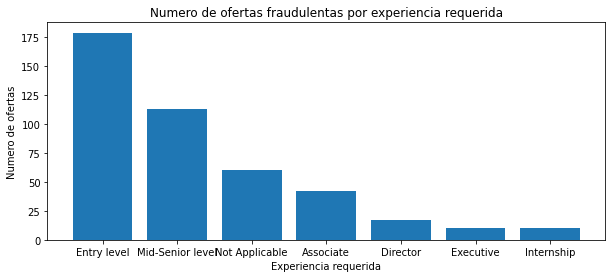

In [ ]:
#Creamos objeto a graficar con sus respectivas dimensiones
fig, ax = plt.subplots(figsize=(10,4))
#Definimos datos a graficar
ax.bar(count_experiencia_fraude.index, count_experiencia_fraude.values)
#Establemcemos titulo al histograma
ax.set_title('Numero de ofertas fraudulentas por experiencia requerida')
#Establecemos nombre de los ejes de histograma
ax.set_ylabel('Numero de ofertas')
ax.set_xlabel('Experiencia requerida')

Ofertas legitimas

Text(0.5, 0, 'Experiencia requerida')

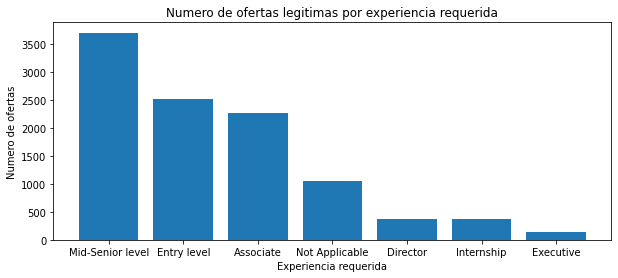

In [ ]:
#Creamos objeto a graficar con sus respectivas dimensiones
fig, ax = plt.subplots(figsize=(10,4))
#Definimos datos a graficar
ax.bar(count_experiencia_legitimo.index, count_experiencia_legitimo.values)
#Establemcemos titulo al histograma
ax.set_title('Numero de ofertas legitimas por experiencia requerida')
#Establecemos nombre de los ejes de histograma
ax.set_ylabel('Numero de ofertas')
ax.set_xlabel('Experiencia requerida')

De las ultimos dos histogramas concluimos que las ofertas legitimas se enfocan en un nicho de seniors nivel medio, es decir, el postulante requiere un nivel de experiencia previo, para el caso de las ofertas fraudulentas observamos que el foco son usuarios con niveles de principiante, esto debido a que puede ser un nicho de usuarios mas vulnerables. 

###**Educación**

####**a) Ofertas fraudulentas**

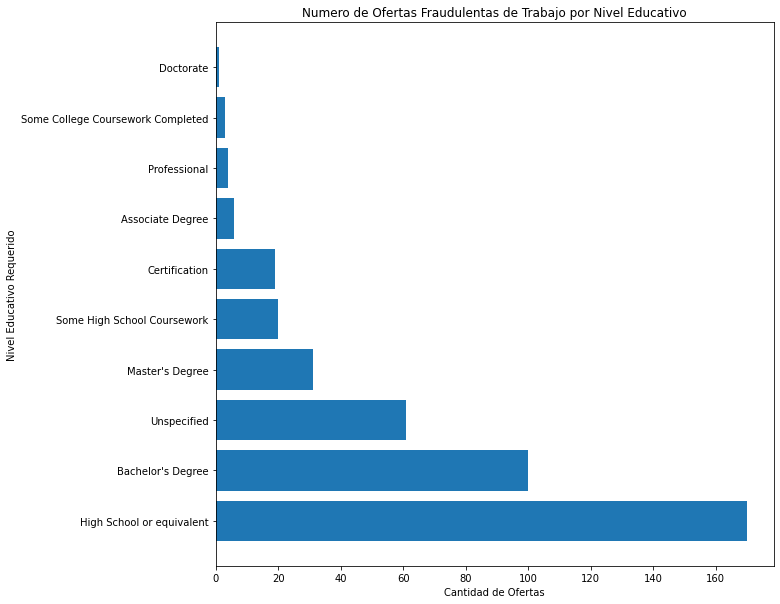

In [ ]:
#Creamos grafica de barras horizontal con los datos correspondientes
plt.barh(count_educacion_fraude.index, count_educacion_fraude.values)
#Definimos dimensiones del grafico
plt.gcf().set_size_inches((10, 10)) 
#Definimos titulo del grafico
plt.title('Numero de Ofertas Fraudulentas de Trabajo por Nivel Educativo')
#Definimos etiquetas de los ejes
plt.ylabel('Nivel Educativo Requerido')
plt.xlabel('Cantidad de Ofertas')
plt.show()

#### **b) Ofertas legitimas**

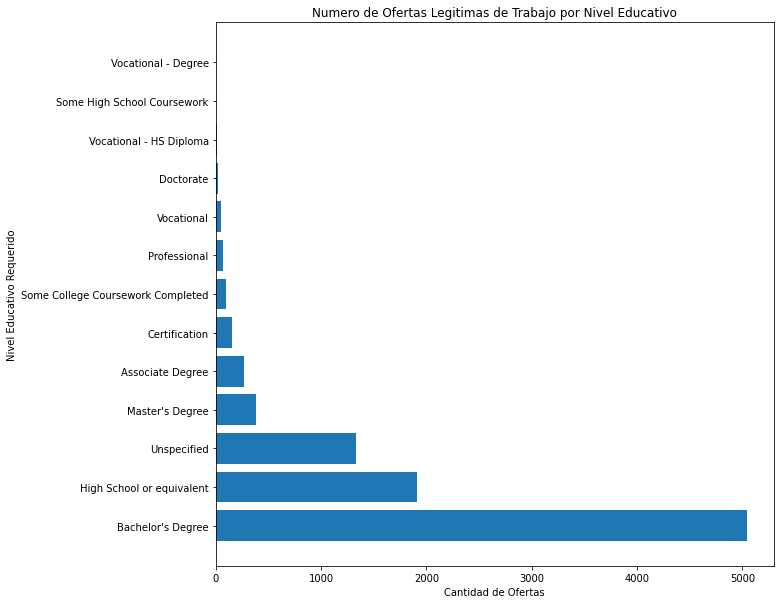

In [ ]:
#Creamos grafica de barras horizontal con los datos correspondientes
plt.barh(count_educacion_legitimo.index, count_educacion_legitimo.values)
#Definimos dimensiones del grafico
plt.gcf().set_size_inches((10, 10)) 
#Definimos titulo del grafico
plt.title('Numero de Ofertas Legitimas de Trabajo por Nivel Educativo')
#Definimos etiquetas de los ejes
plt.ylabel('Nivel Educativo Requerido')
plt.xlabel('Cantidad de Ofertas')
plt.show()

De la grafica anterior se puede observar que las ofertas de trabajo fraudulentas se enfocan en captar publico con nivel de secundaria culminada, mientras las legitimas en individuos con Licenciaturas culminadas, esto representa una realción clara en la cual las ofertas fraudulentas se centran en un publico menos preparado y con menor experiencia, que conforman la mayoria de la población joven y desempleada. 

## **Analisis de los salarios por tipo de oferta laboral**

### **a) Ofertas fraudulentas**

In [ ]:
#Extraemos campos no nulos de salary
nonulossalary_fraude = fraude['salary_range'].fillna(0)
nonulossalary_fraude.value_counts() 



0                  643
7200-1380000        10
30000-50000          8
250000-500000        7
28000-32000          6
                  ... 
34000-50000          1
2000-2000            1
6266624-8582080      1
30000-100000         1
0-30000              1
Name: salary_range, Length: 118, dtype: int64

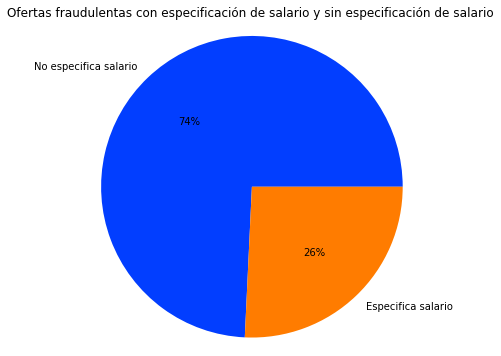

In [ ]:
#Graficamos el pocentaje de ofertas fraudulentas con salario y sin salario
# declaramos los datos
data = [643, 223]
keys = ['No especifica salario', 'Especifica salario']

# Definimos el color
palette_color = sns.color_palette('bright')

# Graficamos la torta que nos muestra el porcentaje de ofertas fraudulentas que tienen y no especificación del salario
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Ofertas fraudulentas con especificación de salario y sin especificación de salario')
plt.axis('equal')
plt.gcf().set_size_inches((6, 6))
plt.show()

### **b) Ofertas legitimas**

In [ ]:
#Extraemos campos no nulos de salary
nonulossalary_legitimo = legitimo['salary_range'].fillna(0)
nonulossalary_legitimo.value_counts()

0                14369
0-0                138
40000-50000         65
30000-40000         51
45000-67000         37
                 ...  
15-25                1
300000-325000        1
27500-36000          1
20-22                1
15500-16500          1
Name: salary_range, Length: 829, dtype: int64

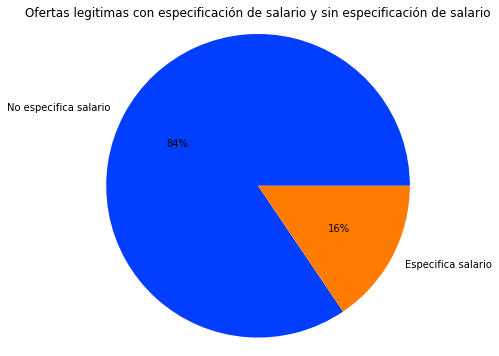

In [ ]:
#Graficamos el pocentaje de ofertas legitimas con salario y sin salario
# declaramos los datos
data = [14369, 2645]
keys = ['No especifica salario', 'Especifica salario']

# Definimos el color
palette_color = sns.color_palette('bright')

# Graficamos la torta que nos muestra el porcentaje de ofertas legitimas que tienen y no especificación del salario
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Ofertas legitimas con especificación de salario y sin especificación de salario')
plt.axis('equal')
plt.gcf().set_size_inches((6, 6))
plt.show()

De las graficas anteriores podemos concluir que la especificación o no del rango de salario de la oferta laboral no es un feature relevante para evaluar la legitimidad de una oferta laboral, en el de las ofertas legitimas tenemos el 84% sin esta especificación y en el caso de las fraudulentas el 74%. 

### **c) Conclusión Analisis de salarios**

De los datos anteriores, ademas, podemos observar que para las ofertas legitimas los rangos de salarios mas relevantes van desde los 30mil a 67mil dolares, mientras en las ofertas fraudulentas 7.2mil a 1.38millones de dolares anuales. En el segundo caso el rango es una valor sobresaliente, ofrecer un sueldo anual de 1.38 millones de dolares a un nicho de jovenes con secundario y poca experiencia laboral, determina sin duda el intento de una estafa laboral. 


# **ESTUDIO DE HIPOTESIS**

**EVALUACIÓN DE HIPOTESIS**

Para nuestro caso de estudio se presentaron tres hipotesis, relacionadas a determinar el peso que juegan ciertos campos en la identificación de una oferta laboral fraudulenta. 

De estas tres hipotesis se puede concluir a alto nivel, que el elemento logo de la compañia juga un papel determinante, debido que la mayoria de ofertas fraudulentas no contienen este campo pero las ofertas no fraudulentas en mas de un 80% si lo contienen. Adicionalmente las ofertas de trabajo fraudulentas suelen no solicitar un nivel alto de formación educativa, y por ultimo se analiza si existe un patron en el uso de cierto grupo de frases o palabras para cada tipo de oferta de trabajo. 



##**HIPOTESIS 1** 

EXISTE Relación entre presencia de logo de la compañia y legitimidad de las oferta laboral

Esta hipotesis tiene la finalidad de indagar la relación existente entre el hecho que una compañia no tenga logo en una oferta laboral, y la posibilidad que esta oferta sea fraudulenta.

In [ ]:
logo2 = df.loc[df['fraudulent'] == 1] #Extraemos las ofertas laborales fraudulentas
logo = pd.DataFrame().assign(Logo=logo2['has_company_logo'], Fraudulento=logo2['fraudulent']) #Seleccionamos la columna logo de la compañia
logo['Logo'].value_counts() #Contabilizamos el numero de ofertas fraudulentas que tienen logo y las que no tienen

0    583
1    283
Name: Logo, dtype: int64

In [ ]:
#El siguiente codigo busca calcular el porcentaje de ofertas fraudulentas con logo y sin logo
data_fraude_logo = [['Tienen logo', 283], ['No tienen logo', 583]]
df_fraude_logo = pd.DataFrame(data_fraude_logo, columns=['Logo', 'Cantidad de ofertas'])
df_fraude_logo['percent'] = (df_fraude_logo['Cantidad de ofertas'] / df_fraude_logo['Cantidad de ofertas'].sum()) * 100
df_fraude_logo

,Logo,Cantidad de ofertas,percent
0,Tienen logo,283,32.678984
1,No tienen logo,583,67.321016


Podemos observar de la tabla anterior que el 67% de las ofertas laborales fraudulentas no presentan logo de la compañia.

In [ ]:
logo2 = df.loc[df['fraudulent'] == 0] #Extraemos las ofertas laborales legitimas
logo = pd.DataFrame().assign(Logo=logo2['has_company_logo'], Fraudulento=logo2['fraudulent']) #Seleccionamos la columna logo de la compañia
logo['Logo'].value_counts() #Contabilizamos el numero de ofertas fraudulentas que tienen logo y las que no tienen

1    13937
0     3077
Name: Logo, dtype: int64

In [ ]:
#El siguiente codigo busca calcular el porcentaje de ofertas fraudulentas con logo y sin logo
data_legitimo_logo = [['Tienen logo', 13937], ['No tienen logo', 3077]]
df_legitimo_logo = pd.DataFrame(data_legitimo_logo, columns=['Logo', 'Cantidad de ofertas'])
df_legitimo_logo['percent'] = (df_legitimo_logo['Cantidad de ofertas'] / df_legitimo_logo['Cantidad de ofertas'].sum()) * 100
df_legitimo_logo

,Logo,Cantidad de ofertas,percent
0,Tienen logo,13937,81.914894
1,No tienen logo,3077,18.085106


Del dataframe anterior podemos observar que para el caso de las ofertas laborales legitimas el 82% suelen tener el logo de la compañia que esta realizando la contratación.

In [ ]:
#A continuación creamos una matriz entre las ofertas laborales fraudulentas/legitimas vs las oferta que tienen/no tiene logo de la compañia
logo_array = np.array([[283, 583], [13937, 3077]])
logo_df = pd.DataFrame(data=logo_array, index=["Fraude", "No Fraude"], columns=["Logo", "No Logo"])
print(logo_df)

            Logo  No Logo
Fraude       283      583
No Fraude  13937     3077


La matriz anterior nos ayuda observar en cierta forma la correlación que existe entre el campo fraudulento y el campo logo de la compañia.

In [ ]:
import plotly.express as px

#Seguido graficamos la relación entre las ofertas fraudulentas con y sin logo de la compañia

fig = px.pie(values = [283, 583],
             names = ['Logo', 'No Logo'],
             color = ['Logo', 'No Logo'],
             title = 'Cantidad de Ofertas Fraudulentas con Logo y Sin Logo',
             hole = 0.5)

fig.show()

Del grafico de anillo anterior observamos que alrededor del 70% de las ofertas laborales fraudulentas no cuentan con un logo de identificación de la compañia, esto debido a que el diseño de un logo corporativo representa costos y  recursos temporales que los estafadores no suelen tener o ven atractivo invertir.

In [ ]:
import plotly.express as px

#Seguido graficamos la relación entre las ofertas legitimas con y sin logo de la compañia

fig = px.pie(values = [13937, 3077],
             names = ['Logo', 'No Logo'],
             color = ['Logo', 'No Logo'],
             title = 'Cantidad de Ofertas Legitimas con Logo y Sin Logo',
             hole = 0.5)

fig.show()

Para este segundo grafico la realidad para las ofertas legitimas es contraria, un 80% de estas cuentan con un logo corporativo, lo que implica y representa un sello de identificación y certificación de la oferta ante los usuarios. 

Correlacion entre campo has_company_log y fraudulent.

In [ ]:
#Por ultimo, para la primera hipotesis, calculamos la correlación real que existe entre los campos de fraudulent y has_company_logo
df2 = df[["has_company_logo", "fraudulent"]]
corrM = df2.corr()
corrM

,has_company_logo,fraudulent
has_company_logo,1.000000,-0.261971
fraudulent,-0.261971,1.000000


De la correlación anterior podemos observar que la correlación entre estas dos variables (fraudulento y logo de la compañia) es negativa, esto implica que mientras el valor fraudulent alcanza su maximo (1), la variable has_company_logo alcanza su minimo (0), es decir, esto indica que cuando la oferta es fraudulentas existe una probabilidad considerable que no contenga el logo de la compañia que realiza la contratación.

## **HIPOTESIS 2**

Tipo de educación requerida por la oferta

En esta hipotesis se busca indagar si las ofetas laborales fraudulentas se enfocan en captar personal de formacón media o baja, tendiendo este nicho a ser el mas vulnerable y con altas tasas de desempleo, y mas facil de ser estafados.

**EXTRACCIÓN DE OFERTAS DE TRABAJO LEGITIMAS**

Para ello se toman las ofertas laborales con el campo Fraudulent_Flag en **0**

In [ ]:
from itertools import groupby
legitimo2 = legitimo.groupby("required_education")["job_id"].count().reset_index(name='cantidad_de_posts')
legitimo2

,required_education,cantidad_de_posts
0,Associate Degree,268
1,Bachelor's Degree,5045
2,Certification,151
3,Doctorate,25
4,High School or equivalent,1910
5,Master's Degree,385
6,Professional,70
7,Some College Coursework Completed,99
8,Some High School Coursework,7
9,Unspecified,1336


In [ ]:
legitimo['required_education'].value_counts() #calculamos el numero de ofertas por grupos del campo required_education

Bachelor's Degree                    5045
High School or equivalent            1910
Unspecified                          1336
Master's Degree                       385
Associate Degree                      268
Certification                         151
Some College Coursework Completed      99
Professional                           70
Vocational                             49
Doctorate                              25
Vocational - HS Diploma                 9
Some High School Coursework             7
Vocational - Degree                     6
Name: required_education, dtype: int64

In [ ]:
#Creamos un dataset que contenga las diferentes clases de eduación requerida y la cantidad de ofertas legitimas por cada clase, ademas del porcentaje que representa cada clase en el universo
#En este dataset se retira la clase Unspecified debido que no aporta por ahora valor a la demostración de la hipotesis
data_legitimo = [['Doctorate', 25], ['Master Degree', 385], ['Associate Degree', 268], ['Professional', 70], ['Bachelor Degree', 5045], ['Certification', 151], ['Some College Coursework Completed', 99], ['Vocational - Degree', 9], ['Vocational - HS Diploma', 6], ['High School or equivalent', 49], ['Vocational', 1910], ['Some High School Coursework', 7]]
df_legitimo = pd.DataFrame(data_legitimo, columns=['Educación Requerida', 'Cantidad de ofertas'])
df_legitimo['percent'] = (df_legitimo['Cantidad de ofertas'] / df_legitimo['Cantidad de ofertas'].sum()) * 100
df_legitimo

,Educación Requerida,Cantidad de ofertas,percent
0,Doctorate,25,0.311565
1,Master Degree,385,4.798106
2,Associate Degree,268,3.339980
3,Professional,70,0.872383
4,Bachelor Degree,5045,62.873878
5,Certification,151,1.881854
6,Some College Coursework Completed,99,1.233799
7,Vocational - Degree,9,0.112164
8,Vocational - HS Diploma,6,0.074776
9,High School or equivalent,49,0.610668


Podemos observar que el mayor grado de experiencia requeridad para las ofertas laborales legitimas es el Bachelo Degree con un 63% de la muestra, y la segunda es la Vocational con un 24%.

In [ ]:
fraude['required_education'].value_counts() ##calculamos el numero de ofertas fraudulentas por grupo del campo required_education

High School or equivalent            170
Bachelor's Degree                    100
Unspecified                           61
Master's Degree                       31
Some High School Coursework           20
Certification                         19
Associate Degree                       6
Professional                           4
Some College Coursework Completed      3
Doctorate                              1
Name: required_education, dtype: int64

In [ ]:
#Creamos un dataset que contenga las diferentes clases de eduación requerida y la cantidad de ofertas fraudulentas por cada clase, ademas del porcentaje que representa cada clase en el universo
#En este dataset se retira la clase Unspecified debido que no aporta por ahora valor a la demostración de la hipotesis
data_fraude = [['Doctorate', 1], ['Master Degree', 31], ['Associate Degree', 6], ['Professional', 4], ['Bachelor Degree', 100], ['Certification', 19], ['Some College Coursework Completed', 3], ['Vocational - Degree', 0], ['Vocational - HS Diploma', 0], ['High School or equivalent', 0], ['Vocational', 170], ['Some High School Coursework', 20]]
df_fraude = pd.DataFrame(data_fraude, columns=['Educación Requerida', 'Cantidad de ofertas'])
df_fraude['percent'] = (df_fraude['Cantidad de ofertas'] / df_fraude['Cantidad de ofertas'].sum()) * 100
df_fraude

,Educación Requerida,Cantidad de ofertas,percent
0,Doctorate,1,0.282486
1,Master Degree,31,8.757062
2,Associate Degree,6,1.694915
3,Professional,4,1.129944
4,Bachelor Degree,100,28.248588
5,Certification,19,5.367232
6,Some College Coursework Completed,3,0.847458
7,Vocational - Degree,0,0.000000
8,Vocational - HS Diploma,0,0.000000
9,High School or equivalent,0,0.000000


Podemos observar que para el caso de las ofertas laborales fraudulentas la mayor cantidad se ubican en las ofertas que requieren experienca Vocacional (Vocational) con un 48% del universo, seguido de la licenciatura (Bachelor Degree) con un 28%.

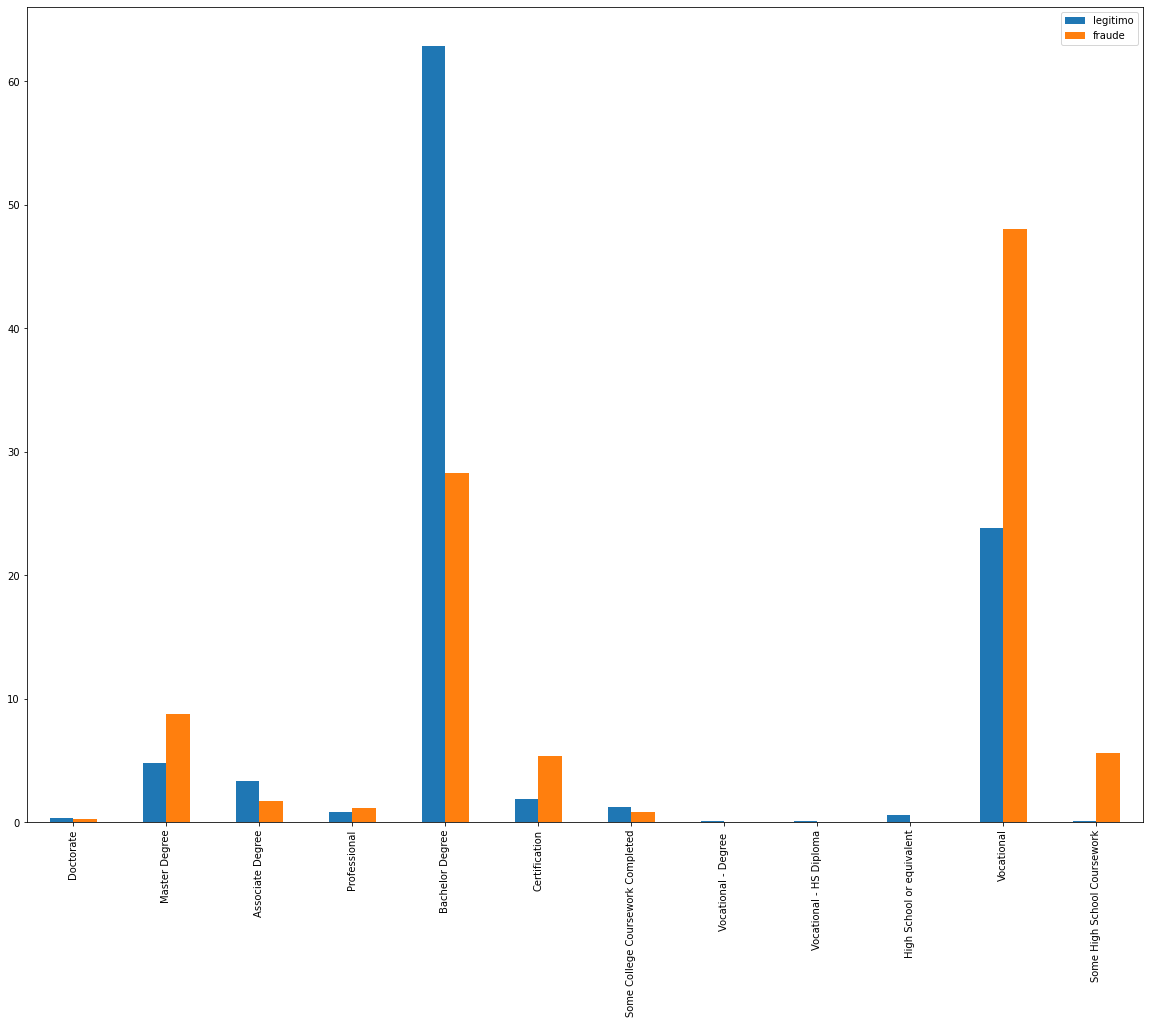

In [ ]:
#Realizamos una grafica de barras para mostrar las relación entre ofertas fradulentas/no fraudulentas vs el tipo de educación que exigen
legitimo3 = [0.311, 4.798, 3.339, 0.872, 62.873, 1.881, 1.233, 0.112, 0.074, 0.610, 23.805, 0.087]
fraude3 = [0.282, 8.757, 1.694, 1.129, 28.248, 5.367, 0.847, 0, 0, 0, 48.022, 5.649]
index = ['Doctorate', 'Master Degree', 'Associate Degree', 'Professional', 'Bachelor Degree', 'Certification', 'Some College Coursework Completed', 'Vocational - Degree ', 'Vocational - HS Diploma', 'High School or equivalent', 'Vocational', 'Some High School Coursework']
df = pd.DataFrame({'legitimo': legitimo3, 'fraude': fraude3}, index=index)
ax = df.plot.bar(rot=90, figsize=(20,15))

Podemos concluir observando la grafica anterior, que las ofertas fraudulentas suelen enfocarse en su mayoria en un nivel educacional vocacional, mientras las legitimas en un nivel de Licenciatura. Esto nos puede indicar que las ofertas laborales fraudulentas se centran posiblemente en un nicho mas vulnerable como es el caso de personas jovenes, con experiencia vocacional y desempleadas, como blanco facil para caer en las estafas.

##**HIPOTESIS 3**

PALABRAS CLAVES
En la siguiente hipotesis queremos evaluar si las palabras que mas aparecen en el campo requirements tienen relación con los sectores de la industria donde mas aparecen cada tipo de oferta laboral (legitima o fraudulenta).

In [ ]:
legitimo.head(4)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0


Ofertas legitimas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-71-1e9033d8f437>:13: FutureWarning:

The default value of regex will change from True to False in a future version.



All frequencies, including STOPWORDS:
           Palabra  Frecuencia
0            sales         652
1        marketing         515
2      engineering         489
3       operations         330
4      development         308
5               it         265
6          product         222
7                &         190
8         services         183
9       technology         172
10        customer         138
11          design         103
12         service         102
13        business         100
14      management          98
15            tech          96
16             and          93
17         finance          92
18     information          86
19          client          69
20        creative          68
21         support          67
22            team          65
23               r          57
24               d          57
25              hr          55
26       technical          50
27      department          49
28          retail          48
29        software          42
3

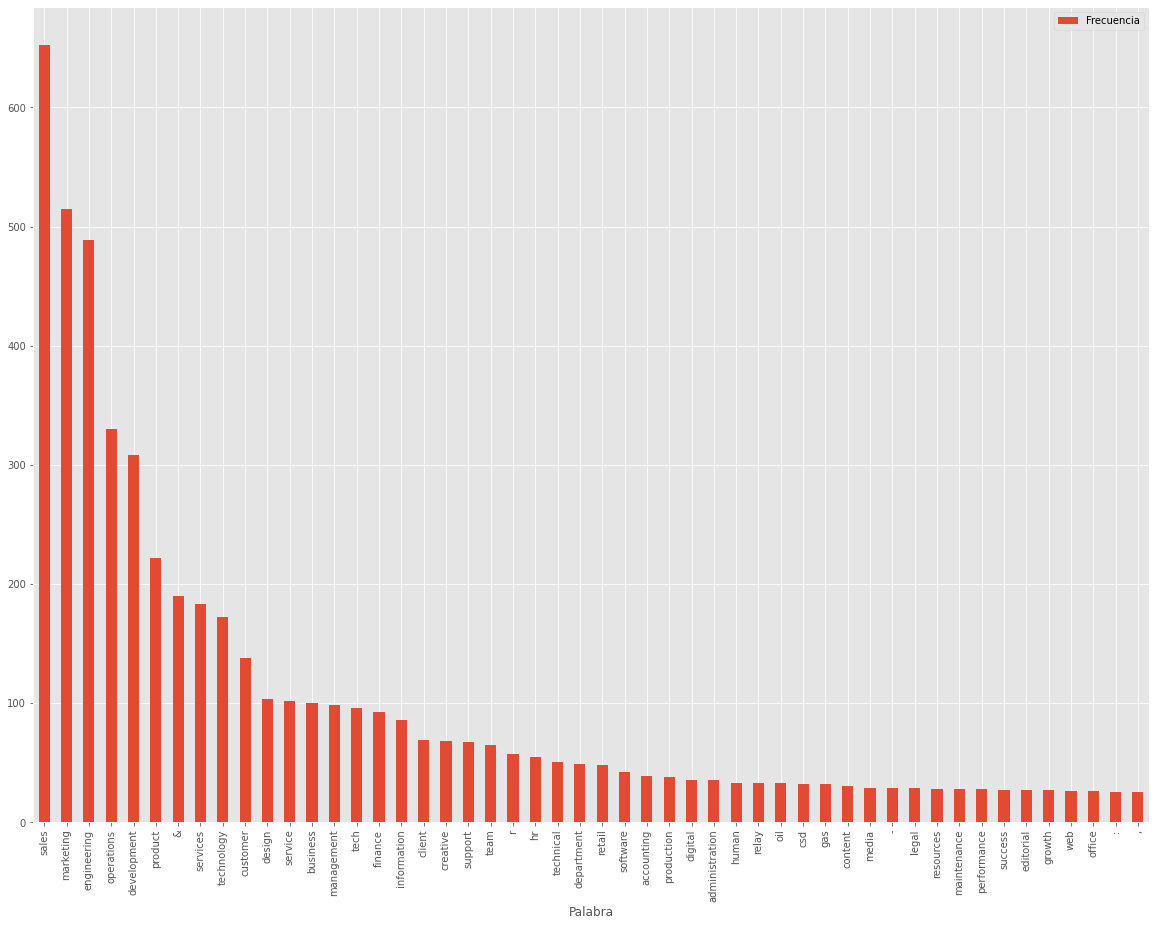

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk #Importamos libreria nltk que nos permite calcular la frecuencia de una palabra dentro de un string
nltk.download('punkt')
nltk.download('stopwords')

top_N = 50 #Definimos el top de palabra que queremos que nos muestre

#legitimo = df.loc[df['fraudulent'] == 0]
legitimo2 = legitimo[['department']]

txt = legitimo2.department.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ') #Definimos el string a evaluar
words = nltk.tokenize.word_tokenize(txt) #Definimos las palabras a buscar en el string, en este caso le estamos indicando que son las palabras que conforman el mismo string
word_dist = nltk.FreqDist(words) #Calculamos la frecuencia de las palabras

stopwords = nltk.corpus.stopwords.words('english') #Tipo de lenguaje o idioma usado en el string
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N), 
                    columns=['Palabra', 'Frecuencia']) #Realizamos un dataframe para ordernar las palabras encontradas y sus frecuencia
print(rslt) #Imprimimos el dataframe
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Palabra', 'Frecuencia']).set_index('Palabra')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=90, figsize=(20,15)) #Graficamos el dataframe

Observamos que para el caso de las ofertas legitimas las palabras de interes que mas aparecen en los requirements son business (negocio), communication (comunicación), management (gerencia), desing (diseño) y customer (cliente), estos nos puede indicar que los puestos de trabajos que aparecen en las ofertas legitimas se enfocan en habilidades blandas y gerenciales, por tal razon pueden exigir mayor experiencia y formación a los aspirantes. 

Ofertas Fraudulentas

All frequencies, including STOPWORDS:
               Palabra  Frecuencia
0          engineering          62
1                    &          31
2               energy          30
3             clerical          29
4                  oil          28
5           technology          28
6          information          27
7                sales          25
8             customer          23
9              service          21
10      administrative          16
11               admin          10
12              center          10
13                call           7
14                 csr           7
15                   ,           7
16                 and           7
17  accounting/payroll           6
18                  hr           5
19                dept           5
20            research           5
21             biotech           5
22                data           5
23               entry           5
24           resources           4
25         maintenance           4
26          callc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-72-d65ff1c8871e>:12: FutureWarning:

The default value of regex will change from True to False in a future version.



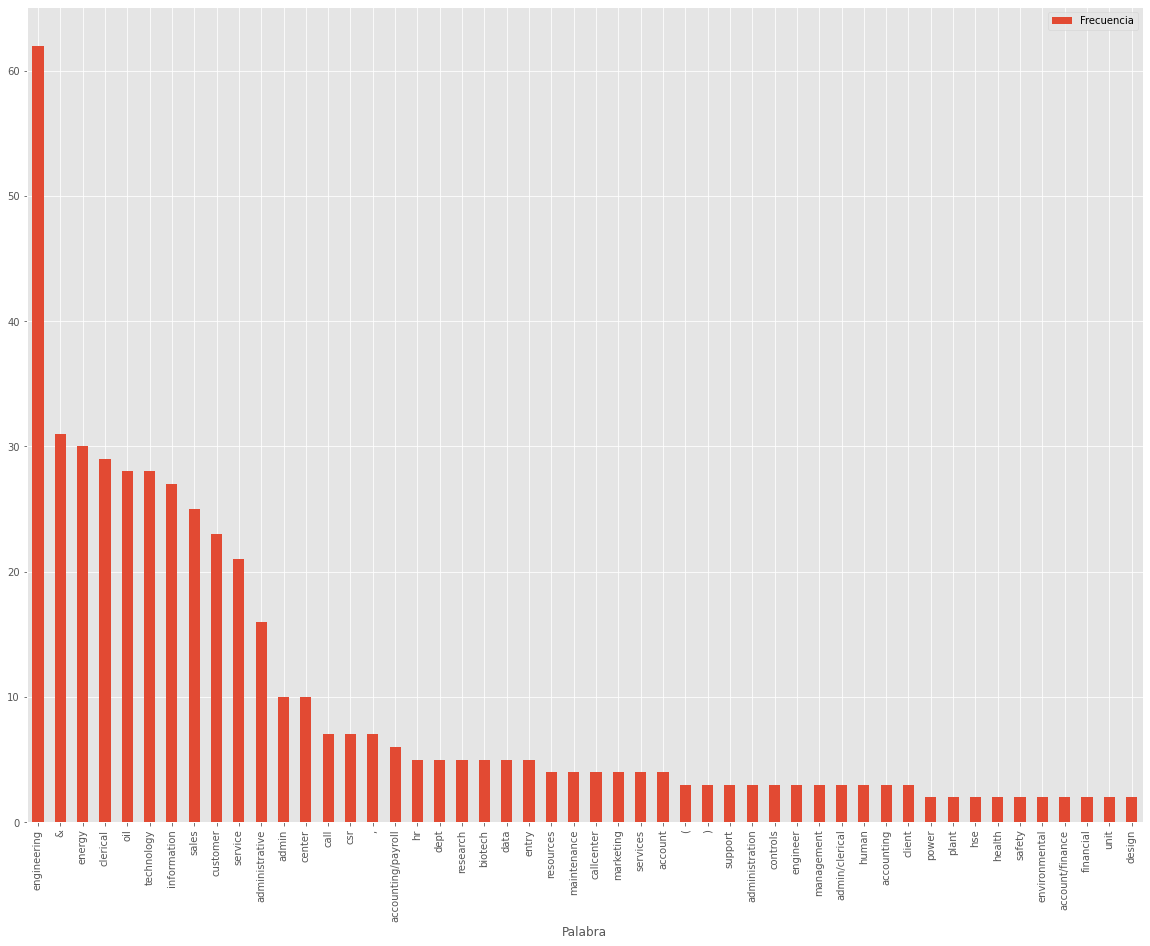

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk #Importamos libreria nltk que nos permite calcular la frecuencia de una palabra dentro de un string
nltk.download('punkt')
nltk.download('stopwords')

top_N = 50 #Definimos el top de palabra que queremos que nos muestre

#fraude = df.loc[df['fraudulent'] == 1]

txt = fraude.department.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ') #Definimos el string a evaluar
words = nltk.tokenize.word_tokenize(txt) #Definimos las palabras a buscar en el string, en este caso le estamos indicando que son las palabras que conforman el mismo string
word_dist = nltk.FreqDist(words) #Calculamos la frecuencia de las palabras

stopwords = nltk.corpus.stopwords.words('english') #Tipo de lenguaje o idioma usado en el string
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N), 
                    columns=['Palabra', 'Frecuencia']) #Realizamos un dataframe para ordernar las palabras encontradas y sus frecuencia
print(rslt) #Imprimimos el dataframe
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Palabra', 'Frecuencia']).set_index('Palabra')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=90, figsize=(20,15)) #Graficamos el dataframe

Las palabras de interes con mayor frecuencia en la ofertas fraudulentas communication (comunicación), esta coincide con la de mayor aparición de las ofertas legitimas, computer (computación), management (gerencia), engineering (ingenieria) y software, podemos observar que las ofertas fraudulentas hacen mas enfoques en habilidades duras, lo cual, pueden enfocarse en un mercado mas especializado o de analistas, que requiera menor experiencia laboral sobretodo a niveles gerenciales. 

# FEATURE ENGINEERING

En esta sección evaluaremos la calidad de nuestro dataset, el balanceo para el desarrollo de un modelo de aprendizaje, la introducción de datos sinteticos y los distintos metodos para determinar el peso de cada uno de nuestros campos, con el fin de determinar cuales son los mas aportativos para nuestros modelos de aprendizaje. 

In [ ]:
# url del Dataset ---> https://docs.google.com/spreadsheets/d/e/2PACX-1vSR1Hlhn7qgmt83mZ-OHqqojywxfnkHbe7POaROmlmKz7HXepHphx7vaBgt00XLc6sLRiOzGH2Mbc-o/pub?output=csv
sheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSR1Hlhn7qgmt83mZ-OHqqojywxfnkHbe7POaROmlmKz7HXepHphx7vaBgt00XLc6sLRiOzGH2Mbc-o/pub?output=csv'
df = pd.read_csv(sheet_url)

In [ ]:
df_feature = df
df_feature.head(4)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0


##ETIQUETADO DE DATOS

Para entrenar a nuestro modelo tomamos 5 campos y los llevamos de categorias tipo strings a valores numericos, esto lo haremos con la libreria LaberEncoder de sklearn.

In [ ]:

# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()

###Etiquetado campo employment_type

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['employment_type'])
 
# printing label
label

array([2, 1, 5, ..., 1, 0, 1])

###Etiquetado campo required_experience

In [ ]:
# Using .fit_transform function to fit label
# encoder and return encoded label
label2 = le.fit_transform(df['required_experience'])
 
# printing label
label2

array([4, 6, 7, ..., 7, 6, 5])

###Etiquetado campo required_education

In [ ]:
# Using .fit_transform function to fit label
# encoder and return encoded label
label3 = le.fit_transform(df['required_education'])
 
# printing label
label3

array([13, 13, 13, ..., 13,  6, 13])

###Etiquetado campo function

In [ ]:
# Using .fit_transform function to fit label
# encoder and return encoded label
label4 = le.fit_transform(df['function'])
 
# printing label
label4

array([22,  7, 37, ..., 37,  9, 12])

###Etiquetado campo industry

In [ ]:
# Using .fit_transform function to fit label
# encoder and return encoded label
label5 = le.fit_transform(df['industry'])
 
# printing label
label5

array([131,  75, 131, ..., 131,  48,  22])

####Creación nueva categoria industry_cat

Observamos que para el caso de la variable industry se generan mas de 100 etiquetas numericas, esto puede generar un cesgo en el modelo de aprendizaje que seleccionemos. Para ello basados en la sección de VISUALIZACIONES, Analisis de los sectores de la Industria, generamos 5 categorias basadas en los sectores de la industria que mas aparecen tanto para ofertas legitimas y fraudulentas, que son: 

1. Energy. 
2. Health. 
3. Financial.
4. Management.
5. Techonology. 

In [ ]:
#Busqueda de palabras claves que nos ayudaran a definir las 5 categorias para la variable industry. 
def label_sub_cat(row):
  if 'Computer' in str(row['industry']):
    return 'Technology'
  elif 'Technology' in str(row['industry']):
    return 'Technology'
  elif 'Accounting' in str(row['industry']):
    return 'Management'
  elif 'Marketing' in str(row['industry']):
    return 'Management'
  elif 'oil' in str(row['industry']):
    return 'Energy'
  elif 'Energy' in str(row['industry']):
    return 'Energy'
  elif 'Financial' in str(row['industry']):
    return 'Financial'
  elif 'Health' in str(row['industry']):
    return 'Health'
  elif 'Care' in str(row['industry']):
    return 'Health'
  else:
    return 'Other'

df_feature['industry_cat'] = df_feature.apply(label_sub_cat, axis=1)
df_feature.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,industry_cat
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,Other
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,Management
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,Other
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Technology
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Health


In [ ]:
# Using .fit_transform function to fit label
# encoder and return encoded label
label_industry = le.fit_transform(df['industry_cat'])
 
# printing label
label_industry

array([4, 3, 4, ..., 4, 4, 5])

In [ ]:
# removing the column 'employment_type', required_experience, required_education, function y industry  from df
# as it is of no use now.
df_feature.drop("employment_type", axis=1, inplace=True)
df_feature.drop("required_experience", axis=1, inplace=True)
df_feature.drop("required_education", axis=1, inplace=True)
df_feature.drop("function", axis=1, inplace=True)
df_feature.drop("industry", axis=1, inplace=True)
df_feature.drop("industry_cat", axis=1, inplace=True)


 
# Appending the array to our dataFrame
# with column name 'Purchased'
df_feature["employment_type"] = label
df_feature["required_experience"] = label2
df_feature["required_education"] = label3
df_feature["function"] = label4
df_feature["industry"] = label_industry
 
# printing Dataframe
df_feature.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,function,industry
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,0,2,4,13,22,4
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,0,1,6,13,7,3
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,0,5,7,13,37,4
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,0,1,5,1,31,5
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,0,1,5,1,16,2


###Etiquetado campos salary_range, location y benefits

In [ ]:
df_feature['salary'] =  np.where(df_feature['salary_range'].isnull(), 0, 1) # clasificamos el campo salario como 1 si existe definición del rango y 0 si no existe
df_feature['is_locations'] =  np.where(df_feature['location'].isnull(), 0, 1) # clasificamos el campo location como 1 si existe definición de la locación y 0 si no existe
df_feature['is_benefits'] =  np.where(df_feature['benefits'].isnull(), 0, 1) # clasificamos el campo benefits como 1 si existe definición de beneficios y 0 si no existe

In [ ]:
df_feature.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,fraudulent,employment_type,required_experience,required_education,function,industry,salary,is_locations,is_benefits
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,0,2,4,13,22,4,0,1,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,0,1,6,13,7,3,0,1,1
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,0,5,7,13,37,4,0,1,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,0,1,5,1,31,5,0,1,1
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,0,1,5,1,16,2,0,1,1


###Sanitización de campos

In [ ]:
#Eliminamos los campos que no son necesario para el entrenamiento del modelo
df_feature.drop("title", axis=1, inplace=True)
df_feature.drop("location", axis=1, inplace=True)
df_feature.drop("salary_range", axis=1, inplace=True)
df_feature.drop("company_profile", axis=1, inplace=True)
df_feature.drop("description", axis=1, inplace=True)
df_feature.drop("requirements", axis=1, inplace=True)
df_feature.drop("benefits", axis=1, inplace=True)
df_feature.drop("department", axis=1, inplace=True)
df_feature.drop("job_id", axis=1, inplace=True)

In [ ]:
df_feature.head(10)

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,function,industry,salary,is_locations,is_benefits
0,0,1,0,0,2,4,13,22,4,0,1,0
1,0,1,0,0,1,6,13,7,3,0,1,1
2,0,1,0,0,5,7,13,37,4,0,1,0
3,0,1,0,0,1,5,1,31,5,0,1,1
4,0,1,1,0,1,5,1,16,2,0,1,1
5,0,0,0,0,5,7,13,37,4,0,1,0
6,0,1,1,0,1,5,5,20,4,1,1,1
7,0,1,1,0,5,7,13,37,4,0,1,1
8,0,1,1,0,1,0,13,37,5,0,1,0
9,0,1,0,0,3,2,4,7,1,0,1,0


##**CONSIDERACIONES**

1. Existe un desbalanceo considerable en nuestra variable objetivo "Fraudulent", debido a que el 95% de nuestro Dataset son ofertas legitimas y el 15% ofertas fraudulentas. 
2. Adicionalmente, existen variables como required_education y function que al categorizarlas por numeros, nos arrojan valores muy altos, esto puede suponer un cesgo importante para nuestro modelo, el cual debemos demostrar. 
3. En nuestro caso, generamos para la variable industry 6 categorias, para reducir el numero de las mismas y no causar un cesgo en nuestro modelo de aprendizaje. 

##**OVERSAMPLING**

Para atender el primer punto de nuestra consideración anterior, vamos a aplicar el metodo de RANDOM OVERSAMPLING para la población de ofertas fraudulentas, esto nos va a permitir equilibrar el numero de tipos de ofertas y no obtener un modelo cesgado. 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')  #hacemos un oversampling para balancear la cantidad de datos target de fraudulent
X=df_feature.drop(['fraudulent'],axis=1) #seleccionamos el dataset excepto la variable target FRAUDULENT
y=df_feature['fraudulent'] #seleccionamos solo la variable target FRAUDULENT
X_over, y_over = oversample.fit_resample(X, y) #se realiza el oversampling del dataset para balancear los datos

##**DATA SPLITTING**

Ahora procedemos a dividir nuestro dataset en una población de entrenamiento (80%) y una población de prueba (20%), estos numero de acuerdo a las referencias. 

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42) #hacemos el spliting de training y test
print(y_train.value_counts())
print(y_test.value_counts())

0    13618
1    13604
Name: fraudulent, dtype: int64
1    3410
0    3396
Name: fraudulent, dtype: int64


##**FEATURE SELECTION**

Seleccionamos las variables de interes que nos permitan construir un modelo de aprendizaje optimo. Para este caso usamos los llamados Wrapper Methods, que nos ayudaran a determinar que variables por si sola y en conjunto con la target nos ofrecen el mejor accuracy. En los siguientes resultados obtenemos que la variable con mayor peso es "has_company_logo".

###**Forward Selection**

En este metodo seleccionamos n variables y las vamos agregando a nuestro modelo para medir su accuracy.

In [ ]:
import statsmodels.api as sm

# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da se toma el valor predefinido SL=0.01
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

<ipython-input-90-59ec699a3414>:11: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/p

['has_company_logo',
 'industry',
 'function',
 'employment_type',
 'is_benefits',
 'has_questions',
 'salary',
 'required_experience',
 'telecommuting']

Para el caso del forward selection podemos observar que las variables que mas accuracy nos aportan a nuestro modelo son has_company_logo, employment_type, function, job:id, is_benefits, has_question, salary, required_experienced y telecommunting. 

###**Backward Selection**

En este caso tomamos todas las variables de nuestro dataset y vamos elminando las que nos otorguen el menos accuracy. 

In [ ]:
# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da, se toma el valor predefinido SL=0.05

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
backward_elimination(X,y)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



['telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'function',
 'industry',
 'salary',
 'is_benefits']

###**Stepwise Regression**

Con este metodo igualmente buscamos determinar que variables son mas utiles para nuestro modelo de clasificación. 

In [ ]:
# creamos una función para que realice este proceso.
# la función necesita cuatro parametros y minimamente dos, data y target
# el tercero y cuarto es opcional, si no se da se toman los valores predefinidos

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X,y)

<ipython-input-94-ccc66b384a19>:10: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/p

['has_company_logo',
 'industry',
 'function',
 'employment_type',
 'is_benefits',
 'has_questions',
 'salary',
 'required_experience',
 'telecommuting']

#FEATURE ENGINEERING II

##Etiquetado campo department

En esta sección estableceremos un etiquetado numerico para el campo department, campo que agregaremos a nuestro analisis de modelos de aprendizaje

Importamos dataset original

In [ ]:
# url del Dataset ---> https://docs.google.com/spreadsheets/d/e/2PACX-1vSR1Hlhn7qgmt83mZ-OHqqojywxfnkHbe7POaROmlmKz7HXepHphx7vaBgt00XLc6sLRiOzGH2Mbc-o/pub?output=csv
sheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSR1Hlhn7qgmt83mZ-OHqqojywxfnkHbe7POaROmlmKz7HXepHphx7vaBgt00XLc6sLRiOzGH2Mbc-o/pub?output=csv'
df = pd.read_csv(sheet_url)

In [ ]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
df_feature_2 = df
label_d = le.fit_transform(df_feature_2['department'])
 
# printing label
label_d

array([ 726, 1110, 1276, ..., 1276, 1276,  413])

Observamos que el campo department cuenta con mas de 1000 categorias numericas, debemos proceder a reducirlas para no generar cesgos en nuestro modelo de aprendizaje.

##Etiquetado campo company_profile

Agregamos campo company_profile, en donde se da una pequeña descripción o biografia de la compañia. 

In [ ]:
df_feature_2['is_profile'] =  np.where(df_feature_2['company_profile'].isnull(), 0, 1) # clasificamos el campo company profile como 1 si existe descripcion de la compañia y 0 si no existe

In [ ]:
df_feature_2['salary'] =  np.where(df_feature_2['salary_range'].isnull(), 0, 1) # clasificamos el campo salario como 1 si existe definición del rango y 0 si no existe
df_feature_2['is_locations'] =  np.where(df_feature_2['location'].isnull(), 0, 1) # clasificamos el campo location como 1 si existe definición de la locación y 0 si no existe
df_feature_2['is_benefits'] =  np.where(df_feature_2['benefits'].isnull(), 0, 1) # clasificamos el campo benefits como 1 si existe definición de beneficios y 0 si no existe

##Reducción categorias campo department

In [ ]:
#Busqueda de palabras claves que nos ayudaran a definir las categorias para la variable department (OBSERVAR HIPOTESIS III). 
def label_sub_cat(row):
  if 'Sales' in str(row['department']):
    return 'Sales'
  elif 'Marketing' in str(row['department']):
    return 'Marketing'
  elif 'Engineering' in str(row['department']):
    return 'Engineering'
  elif 'Operations' in str(row['department']):
    return 'Operations'
  elif 'Development' in str(row['department']):
    return 'Development'
  elif 'Energy' in str(row['department']):
    return 'Energy'
  elif 'Finance' in str(row['department']):
    return 'Finance'
  elif 'Health' in str(row['department']):
    return 'Health'
  elif 'Technology' in str(row['department']):
    return 'Technology'
  elif 'Information' in str(row['department']):
    return 'Information'
  elif 'Clerical' in str(row['department']):
    return 'Clerical'
  elif 'Managment' in str(row['department']):
    return 'Managment'
  else:
    return 'Other'

df_feature_2['department_cat'] = df_feature_2.apply(label_sub_cat, axis=1)
df_feature_2.head(4)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,required_experience,required_education,industry,function,fraudulent,is_profile,salary,is_locations,is_benefits,department_cat
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,Internship,NaN,NaN,Marketing,0,1,0,1,0,Marketing
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1,0,1,1,Other
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,NaN,NaN,NaN,NaN,0,1,0,1,0,Other
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,0,1,1,Sales


Volvemos a etiquetar el campo department, una vez reducido el numero de categorias

In [ ]:
# Using .fit_transform function to fit label
# encoder and return encoded label
label_d = le.fit_transform(df_feature_2['department_cat'])
 
# printing label
label_d

array([7, 9, 9, ..., 9, 9, 3])

##Sanitización del Dataset 

In [ ]:
# removing the column 'employment_type', required_experience, required_education, function y industry  from df
# as it is of no use now.
df_feature_2.drop("job_id", axis=1, inplace=True)
df_feature_2.drop("title", axis=1, inplace=True)
df_feature_2.drop("location", axis=1, inplace=True)
df_feature_2.drop("salary_range", axis=1, inplace=True)
df_feature_2.drop("company_profile", axis=1, inplace=True)
df_feature_2.drop("department_cat", axis=1, inplace=True)
df_feature_2.drop("department", axis=1, inplace=True)
df_feature_2.drop("description", axis=1, inplace=True)
df_feature_2.drop("requirements", axis=1, inplace=True)
df_feature_2.drop("benefits", axis=1, inplace=True)



 
# Appending the array to our dataFrame
df_feature_2["employment_type"] = label
df_feature_2["required_experience"] = label2
df_feature_2["required_education"] = label3
df_feature_2["function"] = label4
df_feature_2["industry"] = label_industry
df_feature_2["department"] = label_d
 
# printing Dataframe
df_feature_2.head(5)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,is_profile,salary,is_locations,is_benefits,department
0,0,1,0,2,4,13,4,22,0,1,0,1,0,7
1,0,1,0,1,6,13,3,7,0,1,0,1,1,9
2,0,1,0,5,7,13,4,37,0,1,0,1,0,9
3,0,1,0,1,5,1,5,31,0,1,0,1,1,10
4,0,1,1,1,5,1,2,16,0,1,0,1,1,9


##Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')  #hacemos un oversampling para balancear la cantidad de datos target de fraudulent
X_2=df_feature_2.drop(['fraudulent'],axis=1) #seleccionamos el dataset excepto la variable target FRAUDULENT
y_2=df_feature_2['fraudulent'] #seleccionamos solo la variable target FRAUDULENT
X_over_2, y_over_2 = oversample.fit_resample(X_2, y_2) #se realiza el oversampling del dataset para balancear los datos

##Datasplitting

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_over_2, y_over_2, test_size= 0.2, random_state= 42) #hacemos el spliting de training y test
print(y_train_2.value_counts())
print(y_test_2.value_counts())

0    13618
1    13604
Name: fraudulent, dtype: int64
1    3410
0    3396
Name: fraudulent, dtype: int64


##Feature Selection

Usamos nuevamente distintos metodos de selección para determinar que variables tienen mayor influencia en nuestro modelo de aprendizaje a desarrollor.

###Forward Selection

In [ ]:
forward_selection(X_2,y_2)

<ipython-input-90-59ec699a3414>:11: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/p

['is_profile',
 'industry',
 'has_company_logo',
 'department',
 'function',
 'employment_type',
 'has_questions',
 'is_benefits',
 'required_experience',
 'salary',
 'telecommuting']

###Backward Selection

In [ ]:
backward_elimination(X_2,y_2)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



['telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'industry',
 'function',
 'is_profile',
 'salary',
 'is_benefits',
 'department']

###Stepwise Regression

In [ ]:
stepwise_selection(X_2,y_2)

<ipython-input-94-ccc66b384a19>:10: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/p

['is_profile',
 'industry',
 'has_company_logo',
 'department',
 'function',
 'employment_type',
 'has_questions',
 'is_benefits',
 'required_experience',
 'salary',
 'telecommuting']

#INDICE DE LA SILUETA

Bajo esta tecnica buscamos identificar cual es el numero de agrupamiento optimo para nuestro Dataset. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Diferentes Mapas de color 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score , silhouette_samples
from sklearn.preprocessing import StandardScaler

In [ ]:
# normalizamos los datos
X = df_feature_2.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
X

array([[-0.2117067 ,  0.50733023, -0.98357998, ...,  0.14047452,
        -1.2165069 , -1.00524599],
       [-0.2117067 ,  0.50733023, -0.98357998, ...,  0.14047452,
         0.82202575,  0.24029632],
       [-0.2117067 ,  0.50733023, -0.98357998, ...,  0.14047452,
        -1.2165069 ,  0.24029632],
       ...,
       [-0.2117067 , -1.97110271, -0.98357998, ...,  0.14047452,
        -1.2165069 ,  0.24029632],
       [-0.2117067 , -1.97110271,  1.01669414, ...,  0.14047452,
         0.82202575,  0.24029632],
       [-0.2117067 ,  0.50733023,  1.01669414, ...,  0.14047452,
        -1.2165069 , -3.49633061]])

In [ ]:
slc = {}
for n_clusters in range(2, 10):
      # Iniciamos el proceso de ajuste a los datos
      clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
      cluster_labels = clusterer.fit_predict(X)
      # El score de silhouette_score da el promedio de todos los valores 
      slc[n_clusters] = silhouette_score(X, cluster_labels)
      print("Para n_clusters =", n_clusters,"El promedio del score de silhouette es: ", slc)

Para n_clusters = 2 El promedio del score de silhouette es:  {2: 0.1686925500535437}
Para n_clusters = 3 El promedio del score de silhouette es:  {2: 0.1686925500535437, 3: 0.16125105139488352}
Para n_clusters = 4 El promedio del score de silhouette es:  {2: 0.1686925500535437, 3: 0.16125105139488352, 4: 0.14432832271573717}
Para n_clusters = 5 El promedio del score de silhouette es:  {2: 0.1686925500535437, 3: 0.16125105139488352, 4: 0.14432832271573717, 5: 0.17245317749030892}
Para n_clusters = 6 El promedio del score de silhouette es:  {2: 0.1686925500535437, 3: 0.16125105139488352, 4: 0.14432832271573717, 5: 0.17245317749030892, 6: 0.14838401662013898}
Para n_clusters = 7 El promedio del score de silhouette es:  {2: 0.1686925500535437, 3: 0.16125105139488352, 4: 0.14432832271573717, 5: 0.17245317749030892, 6: 0.14838401662013898, 7: 0.16267503715496887}
Para n_clusters = 8 El promedio del score de silhouette es:  {2: 0.1686925500535437, 3: 0.16125105139488352, 4: 0.1443283227157371

In [ ]:
slc

{2: 0.1686925500535437,
 3: 0.16125105139488352,
 4: 0.14432832271573717,
 5: 0.17245317749030892,
 6: 0.14838401662013898,
 7: 0.16267503715496887,
 8: 0.18734354244138965,
 9: 0.17509477553119973}

Del resultado anterior podemos observar que el agrupamiento por 8 clusters nos arroja el mejor score de la silueta ( K means)

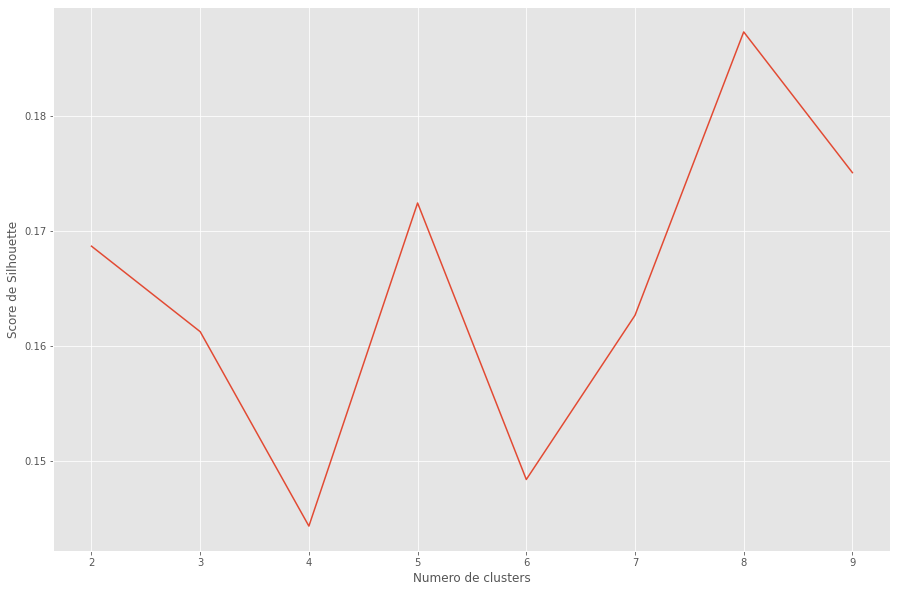

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

La grafica anterior comprueba que el agrupamiento por 8 clusters contiene el mejor score. 

In [ ]:
cluster_labels

array([1, 2, 1, ..., 1, 3, 6], dtype=int32)

In [ ]:
# desnormalizar los datos
#XD = sc.inverse_transform(X)
#plt.figure(figsize=(15,10))
#plt.scatter(XD[:,0],XD[:,1],c=cluster_labels)
#plt.show()

In [ ]:
def silhouette(X):

  for n_clusters in range(2, 10):
      # Crear un subplot de 1 fila y 2 columnas
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)
      # El 1 subplot es para el score de silhouette 
      # El rango del Ind. silhouette es [-1, 1]
      ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
      # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
      # y el grafico de la nube de puntos
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
      # Iniciamos el proceso de ajuste a los datos
      clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
      cluster_labels = clusterer.fit_predict(X)
      # El score de silhouette_score da el promedio de todos los valores 
      silhouette_avg = silhouette_score(X, cluster_labels)
      print("Para n_clusters =", n_clusters,
            "El promedio del score de silhouette es: ", silhouette_avg)
      # Calcular el score de silhouette para cada muestra 
      sample_silhouette_values = silhouette_samples(X, cluster_labels)
      y_lower = 10
      for i in range(n_clusters):
          # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos 
          ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
          ith_cluster_silhouette_values.sort() # Ordenar
          size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
          y_upper = y_lower + size_cluster_i 
          color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)
          # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
          # Calcular el nuevo y_lower para la proxima grafica
          y_lower = y_upper + 10 
      ax1.set_title("Grafico de silhouette para varios clusters.")
      ax1.set_xlabel("Coeficientes de silhouette")
      ax1.set_ylabel("Label del Cluster")
      # La linea vertical para el promedio del score de silhouette de todos los valores
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
      ax1.set_yticks([])  # Quitar labels en y 
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

      # 2 grafica mostrando los clusters formados 
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
      ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
      # Etiquetar a los clusters
      centers = clusterer.cluster_centers_
      # Dibujar en color blanco los centroides de los clusters
      ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
      # Enumerar los centroides
      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

      ax2.set_title("Visualizacion luego de obtener clusters")
      ax2.set_xlabel("Variable X")
      ax2.set_ylabel("Variable Y")

      plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                    "con n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

  plt.show()

Para n_clusters = 2 El promedio del score de silhouette es:  0.1686925500535437
Para n_clusters = 3 El promedio del score de silhouette es:  0.16125105139488352
Para n_clusters = 4 El promedio del score de silhouette es:  0.14432832271573717
Para n_clusters = 5 El promedio del score de silhouette es:  0.17245317749030892
Para n_clusters = 6 El promedio del score de silhouette es:  0.14838401662013898
Para n_clusters = 7 El promedio del score de silhouette es:  0.16267503715496887
Para n_clusters = 8 El promedio del score de silhouette es:  0.18734354244138965
Para n_clusters = 9 El promedio del score de silhouette es:  0.17509477553119973


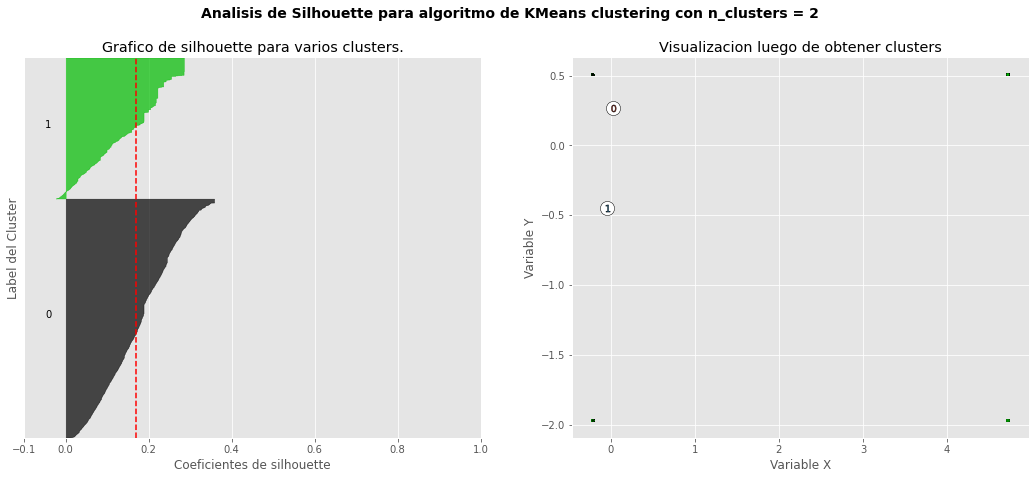

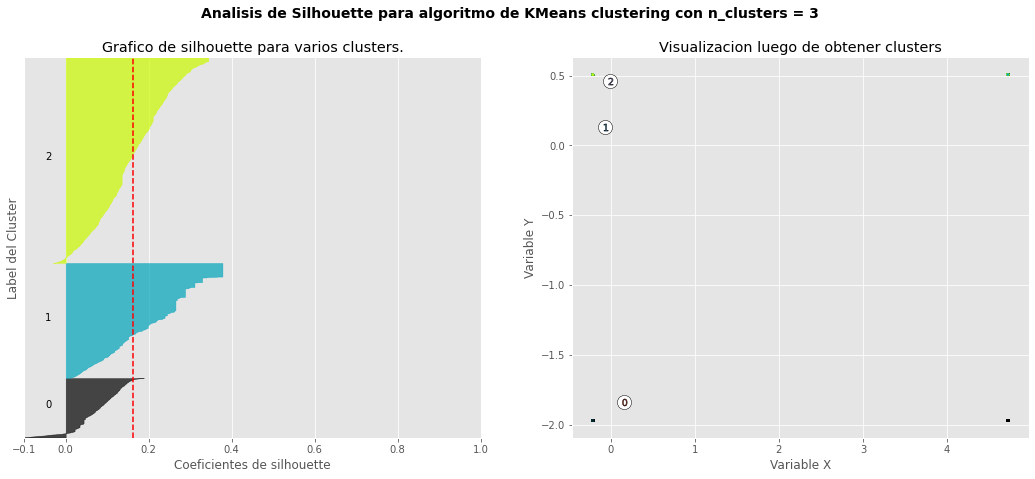

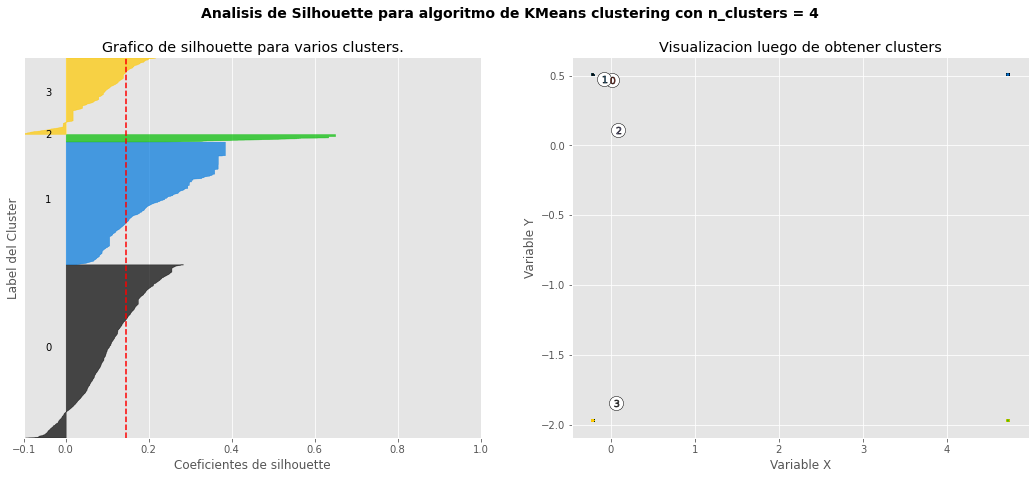

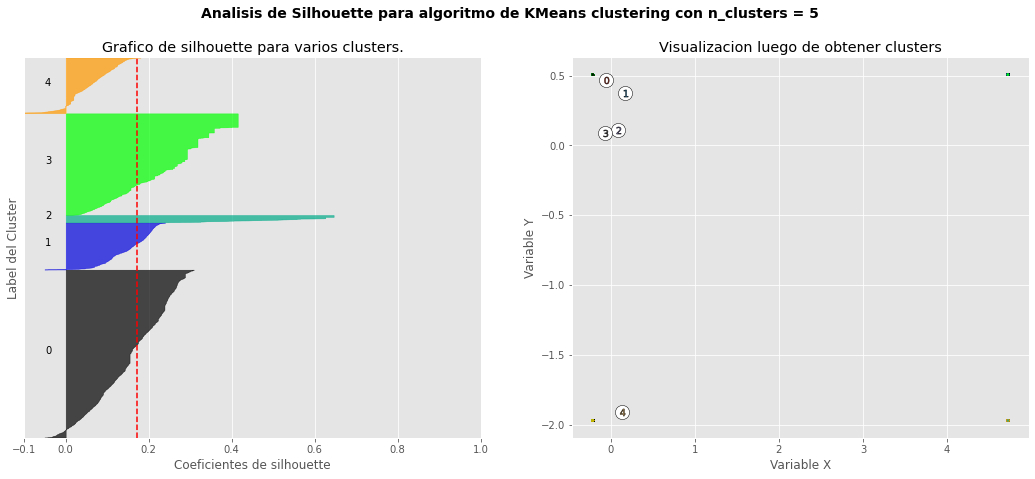

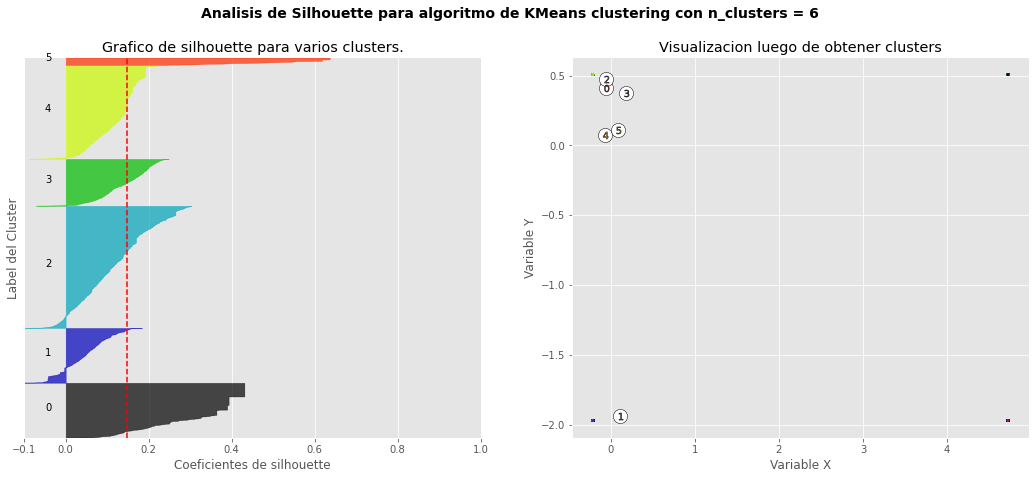

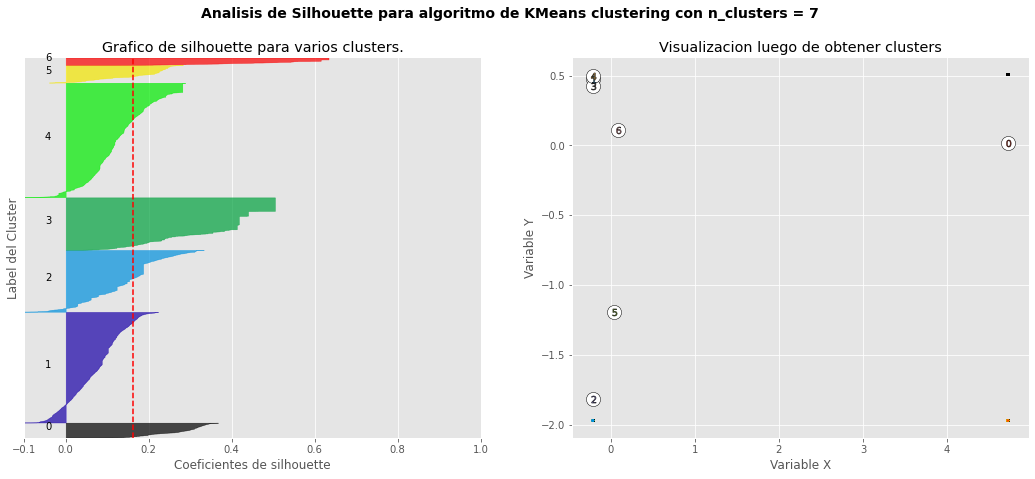

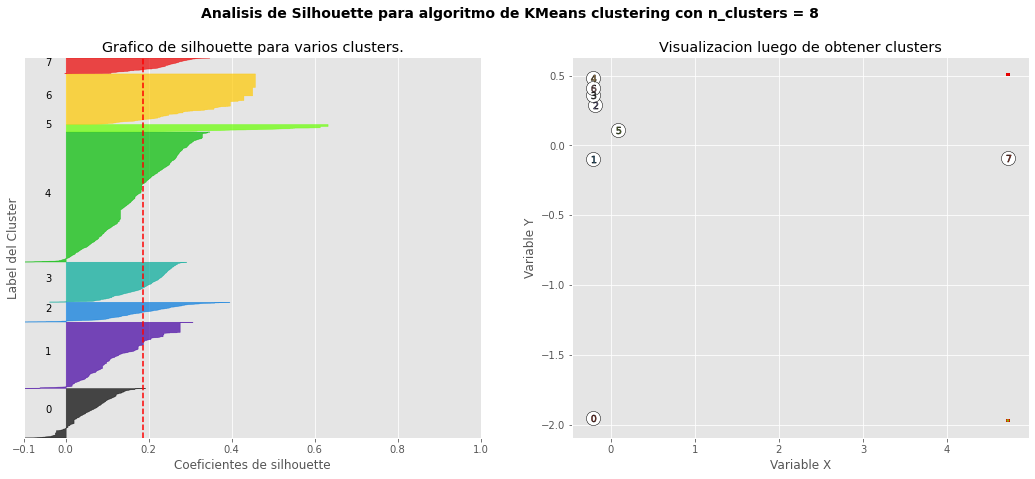

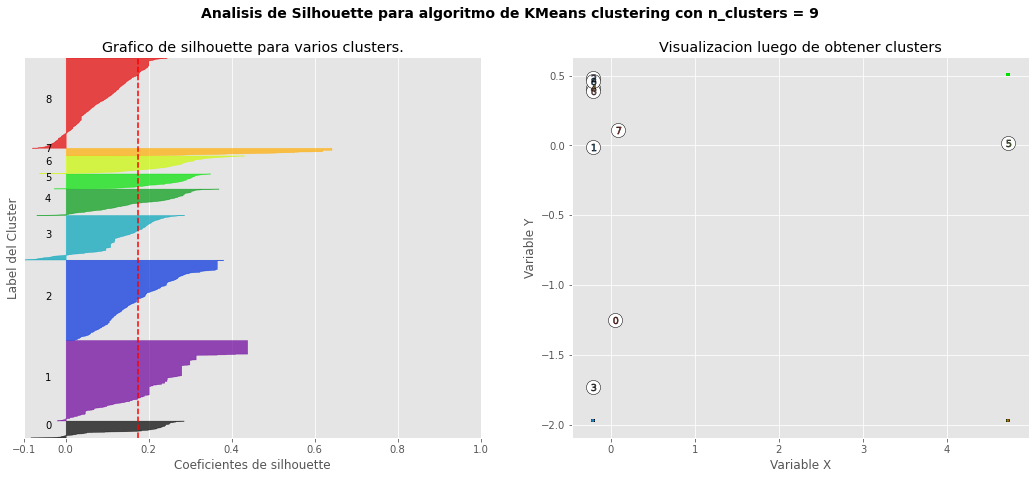

In [ ]:
silhouette(X) #Graficamos las siluetas de cada uno de nuestros clusters

Para 8 clusters los grupos logran pasar el k means establecido de una forma mas distribuida, lo cual concuerda con los scores de kmeans obtenidos, y nos llevan a determinar que n_clusters en 8 es el mas eficiente para el agrupamiento de nuestro Dataset. 

#ANALISIS DE COMPONENTES PRINCIPALES

In [ ]:
# Distribuimos el Dataset entre dos componentes X_3 y y_2
X_3 = df_feature_2.iloc[:, 0:14].values
y_3 = df_feature_2.iloc[:, 8].values

In [ ]:
y_3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_3

array([[0, 1, 0, ..., 1, 0, 7],
       [0, 1, 0, ..., 1, 1, 9],
       [0, 1, 0, ..., 1, 0, 9],
       ...,
       [0, 0, 0, ..., 1, 0, 9],
       [0, 0, 1, ..., 1, 1, 9],
       [0, 1, 1, ..., 1, 0, 3]])

In [ ]:
#Divimos el Dataset en un grupo de entrenamiento y otro de prueba
from sklearn.model_selection import train_test_split
  
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.2, random_state = 0)

In [ ]:
# Aplicamos escalamiento de los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train_3 = sc.fit_transform(X_train_3)
X_test_3 = sc.fit_transform(X_test_3)

In [ ]:
X_train_3

array([[-0.21069533,  0.51026989,  1.01635293, ...,  0.13791722,
        -1.21509436,  0.23591133],
       [-0.21069533,  0.51026989,  1.01635293, ...,  0.13791722,
         0.82298136,  0.23591133],
       [-0.21069533,  0.51026989,  1.01635293, ...,  0.13791722,
        -1.21509436,  0.23591133],
       ...,
       [-0.21069533,  0.51026989,  1.01635293, ...,  0.13791722,
         0.82298136,  1.4915302 ],
       [-0.21069533,  0.51026989, -0.98391018, ...,  0.13791722,
        -1.21509436,  0.23591133],
       [-0.21069533, -1.95974721,  1.01635293, ...,  0.13791722,
         0.82298136,  0.23591133]])

In [ ]:
X_test_3

array([[-0.21571288,  0.49553914,  1.01806015, ...,  0.15030234,
         0.81821011,  0.25740535],
       [-0.21571288,  0.49553914,  1.01806015, ...,  0.15030234,
        -1.22217996,  0.25740535],
       [-0.21571288,  0.49553914, -0.98226023, ...,  0.15030234,
        -1.22217996,  0.25740535],
       ...,
       [ 4.63579185,  0.49553914,  1.01806015, ...,  0.15030234,
         0.81821011,  0.25740535],
       [-0.21571288,  0.49553914,  1.01806015, ...,  0.15030234,
         0.81821011,  0.25740535],
       [-0.21571288,  0.49553914,  1.01806015, ...,  0.15030234,
         0.81821011,  0.25740535]])

In [ ]:
y_train_3

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test_3

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Aplicamos el ajusta para el analisis de los componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_3 = pca.fit_transform(X_train_3)
X_test_3 = pca.transform(X_test_3)

In [ ]:
X_train_3

array([[ 1.61346812, -1.81323225],
       [-1.31983385,  0.1017435 ],
       [-1.0717342 , -0.4575093 ],
       ...,
       [-1.04269093,  1.34233579],
       [-1.13160181,  0.22361126],
       [ 2.78249926,  0.59141933]])

In [ ]:
X_test_3

array([[ 1.03599302, -1.81950968],
       [ 1.814555  , -1.90251203],
       [-0.64739572, -0.02509825],
       ...,
       [ 1.76971657,  0.46461302],
       [ 0.35925555, -1.43968664],
       [-1.73389856,  0.41554402]])

In [ ]:
#Se muestra la variabilidad para cada componente 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.18833051, 0.13327289])

Podemos observar que el PC1 y PC2 solo concentran el 31% de la explicavilidad de nuestro Dataset, es decir, estamos perdiendo aproximadamente un 70% de información al reducir nuestro Dataset a dos componentes. 

In [ ]:
from sklearn.linear_model import LogisticRegression
Reg_Log = LogisticRegression(random_state = 0)
Reg_Log.fit(X_train_3, y_train_3)

# Se predice los valores del dataset de prueba
y_pred_3 = Reg_Log.predict(X_test_3)

# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_3, y_pred_3)
cm

array([[3412,   11],
       [  57,   96]])

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_3, y_pred_3)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.9809843400447428


A pesar de perderse el 70% de la informacón al reducir nuestro Dataset a 2 componentes, se logra obtener en la evaluación del modelo un accuracy del 98%. 

In [ ]:
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_3, y_train_3)

LogisticRegression(random_state=0)

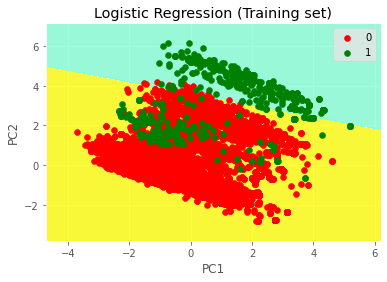

In [ ]:

# Prediciendo modelo de entrenamiento y realizando un scatter plot del resultados  
from matplotlib.colors import ListedColormap
  
X_set_3, y_set_3 = X_train_3, y_train_3
X1, X2 = np.meshgrid(np.arange(start = X_set_3[:, 0].min() - 1,
                     stop = X_set_3[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set_3[:, 1].min() - 1,
                     stop = X_set_3[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set_3)):
    plt.scatter(X_set_3[y_set_3 == j, 0], X_set_3[y_set_3 == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # para etiqueta X
plt.ylabel('PC2') # para etiqueta Y
plt.legend() # Leyenda
  
# Muestra scatter plot
plt.show()

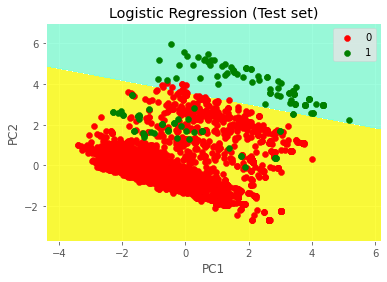

In [ ]:
# Scatter plot de los datos de pruebas
from matplotlib.colors import ListedColormap
  
X_set_3, y_set_3 = X_test_3, y_test_3
  
X1, X2 = np.meshgrid(np.arange(start = X_set_3[:, 0].min() - 1,
                     stop = X_set_3[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set_3[:, 1].min() - 1,
                     stop = X_set_3[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set_3)):
    plt.scatter(X_set_3[y_set_3 == j, 0], X_set_3[y_set_3 == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
# Titulo del scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # etiqueta para X
plt.ylabel('PC2') # etiqueta para Y
plt.legend()
  
# Muestra scatter plot
plt.show()

Podemos observar del scatter plot que nuestra predicción cuenta con una linealidad, lo que indica que no existe una buena dispersión y variabilidad de los datos en los componentes seleccionados. Adicionalmente en las areas azules y amarillas no se concentran todos los datos de un solo tipo, los datos verdes se encuentran gran parte dispersos entre las dos bandas.  

#ANALISIS DE MODELOS DE APRENDIZAJES

En esta sección vamos a evaluar distintos modelos de aprendizaje y buscaremos cuales de ellos se adaptan mejor, segun sus parametros, al modelo de predicción esperado acorde a nuestro dataset. Este aplica para el primer Feature Engineering que se realizo. 

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **KNN (N Vecinos Cercanos)**

Bajo este metodo de aprendizaje podemos alcanzar una precisión del 90%, igualmente para el parametro f1 score y el recall. 

El algoritmo de N Vecinos Cercanos cuenta con los siguientes parametros a tomar en cuenta, de acuerdo a la web de la libreria sklearn: 

**1. n_neighbors**: Esta define el numero de vecinos para nuestro modelo. 

**2. weights**: Este parametro define el peso de cada punto. Uniforme si todos los puntos cuentan con el mismo peso. Distance donde los vecinos mas cercanos tendran mas peso que los lejanos. Callable donde nosotros mismos podemos definir un array de distancias y luego el algoritmo los transforma en puntos (pesos).

**3. algorithm** : Algoritmo a seleccionar para el calculo de los vecinos mas cercanos, como ball_tree, brute_force, auto, etc. En nuestro caso podemos usar el valor "auto", ya que permite a la mismo función ubicar el mejor algoritmo para el modelo.

**4. leaf_size** : tamaño de la hoja (size leaf). 

**5. n_jobs** : numero de procesos paralelos que se ejecutan para la busqueda de los vecinos mas cercanos. 


In [ ]:
from sklearn.model_selection import GridSearchCV #Importamos libreria GridSearch
from sklearn.neighbors import KNeighborsClassifier #Importamos libreria para el uso del algoritmo KNN
vecinos = KNeighborsClassifier() #Instanciamos el modelo
vecinos

KNeighborsClassifier()

In [ ]:
params = {
    'n_neighbors' : [5,50,100],
    'weights': ['distance', 'uniform'],
    'algorithm': ['ball_tree', 'brute_force', 'auto'],
    'leaf_size':[1,2,5],
    'n_jobs':[1,-1]
} #Definimos los valores candidatos de cada uno de los parametros seleccionados para la ejecución de este algoritmo 

grid_vecinos = GridSearchCV(estimator=vecinos,
                                  param_grid=params,
                                  cv=2,
                                  scoring="neg_mean_absolute_error",
                                  verbose=1,
                                  n_jobs = -1) #Pasamos los parametros y la función KNN a GridSearchCV para que itere y halle los mejores para nuestro modelo de aprendizaje

In [ ]:
import time
start = time.time()

grid_vecinos.fit(X_train,y_train) #Pasamos nuestro dataset de entrenamiento para ejecutar con los parametros especificados

end = time.time()
diff = end - start
print('Tiempo de ejecuìn de Grid Search (en segundos):', diff)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
Tiempo de ejecuìn de Grid Search (en segundos): 224.4901638031006


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ne

In [ ]:
grid_vecinos.best_params_ #Terminada la busqueda y ejecución mostramos los mejores parametros seleccionados

{'algorithm': 'auto',
 'leaf_size': 5,
 'n_jobs': 1,
 'n_neighbors': 5,
 'weights': 'distance'}

In [ ]:
grid_vecinos.best_estimator_

KNeighborsClassifier(leaf_size=5, n_jobs=1, weights='distance')

Acorde a GridSearchCV los mejores parametros para entrenar a nuestro modelo bajo el algoritmo KNN son: 

1. **algorithm**: 'auto'
2. **leaf_size**: 5
3. **n_jobs**: 1
4. **n_neighbors**: 5
5. **weights**: 'distance'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Pasamos los mejores parametros seleccionados por GridSearchCV a la funsión KNN
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance', algorithm='ball_tree', leaf_size=5, n_jobs=1) # asigno a rf el algoritmo de KNeighborsClassifier
knn.fit(X_train,y_train)  # entreno el modelo knn con las variables en X_train y la variable target en Y_train
y_pred_knn = knn.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

Accuracy: 0.9196297384660593
ROC AUC Score: 0.9620497549298985


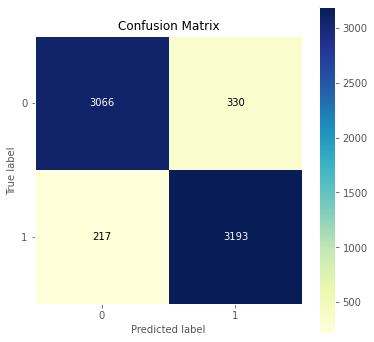

In [ ]:
# graficamos matriz de confusion con 'Y testing' y 'Y_prediccion_knn'
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');

print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn)) 

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_knn)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3396
           1       0.91      0.94      0.92      3410

    accuracy                           0.92      6806
   macro avg       0.92      0.92      0.92      6806
weighted avg       0.92      0.92      0.92      6806



Para N Vecinos obtuvimos un 92% de precisión, adicionalmente para el parametro ROC AUC Score se obtuvo un 96% lo cual implica que nuestro modelo es bastante eficiente clasificando los datos de entrada. 

## **Random Forest Clasificación**

Bajo este modelo alcanzamos una precisión, f1 score y reacall del 93%. 

Acorde a la documentación de la libreria sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) el algoritmo Random Forest cuenta con los siguientes parametros: 

1. **n_estimators**: Numero de arboles en el bosque.
2. **criterion**: Mide la calidad de la división de los datos, puede ser gini, entropy o log_loss.
3. **max_depth**: La maxima profundida del arbol. 
4. **min_samples_split**: Valor minimo de muestras para dividir un nodo.
5. **min_samples_leaf**: Valor minimo de muestras para estar en la hoja de un nodo.
6. **min_weight_fraction_leaf**: Valor minimo de la fracción de peso de la suma total de los pesos. 
7. **max_features**: Numero de caracteristicas a considerar cuando se busca la mejor divisón. 
8. **max_leaf_nodes**: Maximo de hojas en un nodo. 
9. **min_impurity_decrease**: Minimo valor de la impureza de un nodo.
10. **bootstrap**: Se toman muestras para la construccón de los arboles.
11. **oob_score**: Estimación de un score. 
12. **n_jobs**: Numero de procesos en paralelos que se pueden ejecutar. 
13. **random_state**: Controlar la aleatoriedad durante la construcción de un arbol. 
14. **verbose**: Controlar el numero de detalles cuando el algoritmo esta en eejcución. 
15. **warm_start**: Reuso de soluciones previas.
16. **class_weight**: Define el peso de las clases. 
17. **ccp_alpha**: Define maxima complejidad de un arbol.
18. **max_samples**: Maximo numero de muestras para entrenamiento. 

Definido estos parametros haremos uso de la función GridSearchCV, para encontrar los valores de cada parametros que mejor se ajusten a la predicción de nuestro modelo. 

In [ ]:
from sklearn.model_selection import GridSearchCV #Importamos libreria GridSearch
from sklearn.ensemble import RandomForestClassifier #Importamos libreria para el uso del algoritmo Random Forest
random = RandomForestClassifier() #Instanciamos el modelo
random

RandomForestClassifier()

In [ ]:
params = {
    'n_estimators' : [5,50,100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 10, 20],
    'max_leaf_nodes':[5,10,20],
    'n_jobs':[1,-1],
    'class_weight': ['balanced', 'balanced_subsample']
} #Definimos los valores candidatos de cada uno de los parametros seleccionados para la ejecución de este algoritmo 

grid_random = GridSearchCV(estimator=random,
                                  param_grid=params,
                                  cv=2,
                                  scoring="neg_mean_absolute_error",
                                  verbose=1,
                                  n_jobs = -1) #Pasamos los parametros y la función de Random Forest a GridSearchCV para que itere y halle los mejores para nuestro modelo de aprendizaje

In [ ]:
import time
start = time.time()

grid_random.fit(X_train,y_train) #Terminada la busqueda y ejecución mostramos los mejores parametros seleccionados

end = time.time()
diff = end - start
print('Tiempo de ejecuión Grid Search (en segundos):', diff)

Fitting 2 folds for each of 324 candidates, totalling 648 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


216 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

Tiempo de ejecuión Grid Search (en segundos): 152.28235459327698


In [ ]:
grid_random.best_params_ #Terminada la busqueda y ejecución mostramos los mejores parametros seleccionados

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_leaf_nodes': 20,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': 1}

Acorde a GridSearchCV los mejores parametros para entrenar a nuestro modelo bajo el algoritmo de Random Forest son:

1. **class_weight**: 'balanced'
2. **criterion**: 'gini'
3. **max_leaf_nodes**: 20
4. **min_samples_split**: 2
5. **n_estimators**: 50
6. **n_jobs**: 1

Accuracy: 0.8310314428445489
ROC AUC Score: 0.9177446124300108


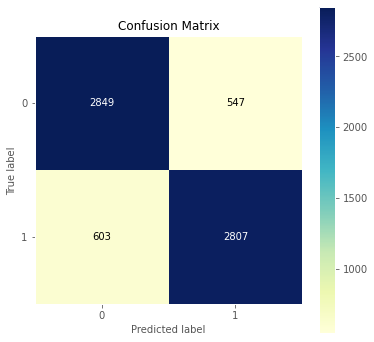

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Pasamos los mejores parametros seleccionados por GridSearchCV a la funsión Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', criterion='gini', max_leaf_nodes=20, min_samples_split=2, n_jobs=1) # asigno a rf el algoritmo de RandomForestClassifier
rf.fit(X_train,y_train)  # entreno el modelo rf con las variables en X_train y la variable target en Y_train
y_pred_rf = rf.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_rf)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      3396
           1       0.84      0.82      0.83      3410

    accuracy                           0.83      6806
   macro avg       0.83      0.83      0.83      6806
weighted avg       0.83      0.83      0.83      6806



Para el algoritmo de Random Forest obtuvimos un 83% de precisión, adicionalmente para el parametro ROC AUC Score se obtuvo un 91%, lo cual implica que nuestro modelo es bastante eficiente clasificando los datos de entrada, pero no mejor que el modelo de N Vecinos (96%).

## **Decision Tree**

Para el modelo de arbol de decisión alcanzamos una precisión, recall y f1 score del 78%. 

Acorde a la documentación de la libreria sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) el algoritmo Decision Tree cuenta con los siguientes parametros:

1. **splitter**: Estrategia para decidir la divisón de cada nodo, puede best o random.
2. **criterion**: Mide la calidad de la división de los datos, puede ser gini, entropy o log_loss.
3. **max_depth**: La maxima profundida del arbol.
4. **min_samples_split**: Valor minimo de muestras para dividir un nodo.
5. **min_samples_leaf**: Valor minimo de muestras para estar en la hoja de un nodo.
6. **min_weight_fraction_leaf**: Valor minimo de la fracción de peso de la suma total de los pesos.
7. **max_features**: Numero de caracteristicas a considerar cuando se busca la mejor divisón.
8. **max_leaf_nodes**: Maximo de hojas en un nodo.
9. **min_impurity_decrease**: Minimo valor de la impureza de un nodo.
10. **random_state**: Controlar la aleatoriedad durante la construcción de un arbol.
11. **class_weight**: Define el peso de las clases.
12. **ccp_alpha**: Define maxima complejidad de un arbol.


Definido estos parametros haremos uso de la función GridSearchCV, para encontrar los valores de cada parametros que mejor se ajusten a la predicción de nuestro modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV #Importamos libreria GridSearch
from sklearn.tree import DecisionTreeClassifier #Importamos libreria para el uso del algoritmo Decision Tree
tree = DecisionTreeClassifier() #Instanciamos el modelo
tree

DecisionTreeClassifier()

In [ ]:
params = {
    'splitter' : ['best', 'random'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 10, 20],
    'max_leaf_nodes':[5,10,50],
    'max_features':['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
} #Definimos los valores candidatos de cada uno de los parametros seleccionados para la ejecución de este algoritmo 

grid_tree = GridSearchCV(estimator=tree,
                                  param_grid=params,
                                  cv=2,
                                  scoring="neg_mean_absolute_error",
                                  verbose=1,
                                  n_jobs = -1) #Pasamos los parametros y la función de Decision Tree a GridSearchCV para que itere y halle los mejores para nuestro modelo de aprendizaje

In [ ]:
import time
start = time.time()

grid_tree.fit(X_train,y_train)

end = time.time()
diff = end - start
print('Tiempo de ejecución Grid Search (en segundos):', diff)

Fitting 2 folds for each of 324 candidates, totalling 648 fits
Tiempo de ejecución Grid Search (en segundos): 5.092238664627075


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


432 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

-----------------------------------------------

In [ ]:
grid_tree.best_params_  #Terminada la busqueda y ejecución mostramos los mejores parametros seleccionados

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_split': 10,
 'splitter': 'best'}

Acorde a GridSearchCV los mejores parametros para entrenar a nuestro modelo bajo el algoritmo de Decision Tree son:

1. **class_weight**: 'balanced'
2. **criterion**: 'gini'
3. **max_features**: 'auto'
4. **max_leaf_nodes**: 50
5. **min_samples_split**: 10
6. **splitter**: 'best'

Accuracy: 0.8373493975903614
ROC AUC Score: 0.9021284744170301


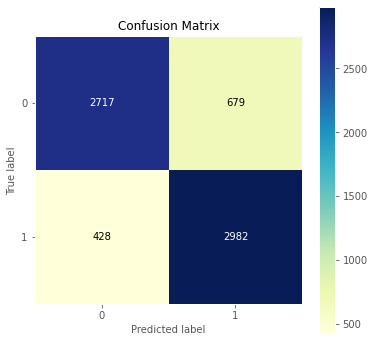

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(class_weight= 'balanced',
 criterion= 'gini',
 max_features= 'auto',
 max_leaf_nodes= 50,
 min_samples_split= 10,
 splitter= 'best') # creamos el modelo dtc con el algoritmo de DecisionTreeClassifier
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_dtc, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_dtc))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_dtc))

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_dtc)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3396
           1       0.81      0.87      0.84      3410

    accuracy                           0.84      6806
   macro avg       0.84      0.84      0.84      6806
weighted avg       0.84      0.84      0.84      6806



In [ ]:
feature_names = X_test.columns # obtenemos el nombre de las variables que estan en el dataset de training
feature_names

Index(['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'function', 'industry',
       'salary', 'is_locations', 'is_benefits'],
      dtype='object')

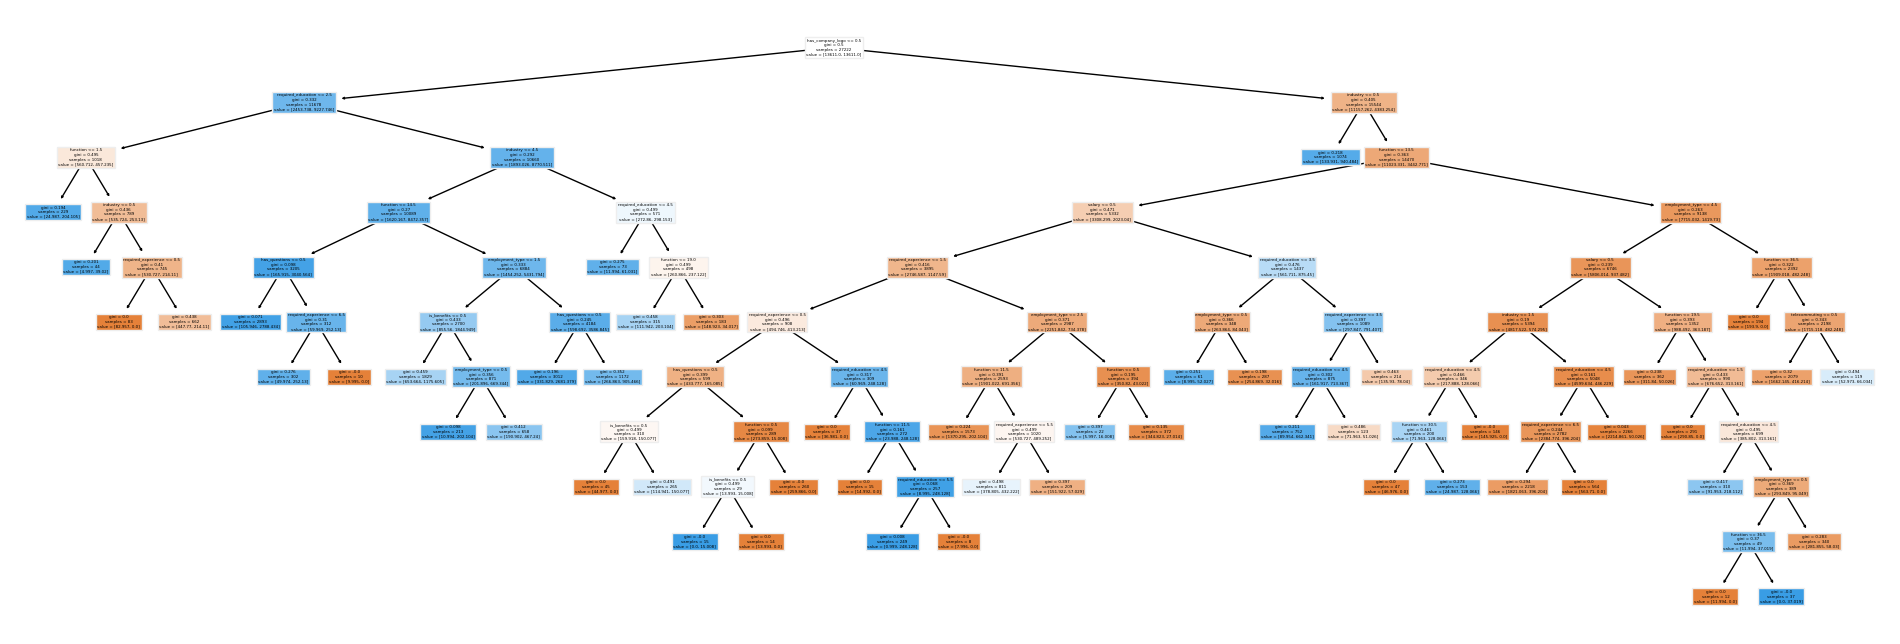

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plot_tree(dtc, feature_names=feature_names, filled=True) #graficamos el arbol del modelo dtc con los feature names obtenidos
plt.show()

Del Diagrama anterior observamos que la variable con mayor peso es "has_company_logo", cumpliendo una de nuestras hipotesis donde planteamos que esta variable tiene un gran peso para determinar la legitimidad de una oferta laboral.

Para el algoritmo de Decision Tree obtuvimos un 83% de precisión, adicionalmente para el parametro ROC AUC Score se obtuvo un 90%, lo cual implica que nuestro modelo es bastante eficiente clasificando los datos de entrada, pero no mejor que el modelo de N Vecinos (96%), el cual muestra ser el algoritmo mas eficiente para nuestro modelo de clasificación. 

#ANALISIS DE MODELOS DE APRENDIZAJES II

Procedemos a analizar nuestro modelo de aprendizaje con las variables company_profile y department agregados al dataset de estudio, proceso que se hizo en la sección de Feature Engineering II. 

##KNN (N Vecinos Cercanos)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Pasamos los mejores parametros seleccionados por GridSearchCV a la funsión KNN
knn_2 = KNeighborsClassifier(n_neighbors = 50, weights='distance', algorithm='auto', leaf_size=2, n_jobs=1) # asigno a rf el algoritmo de KNeighborsClassifier
knn_2.fit(X_train_2,y_train_2)  # entreno el modelo knn con las variables en X_train y la variable target en Y_train
y_pred_knn_2 = knn_2.predict(X_test_2) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_knn_2 = knn_2.predict_proba(X_test_2)[:, 1]

Accuracy: 0.9368204525418748
ROC AUC Score: 0.9860874791457261


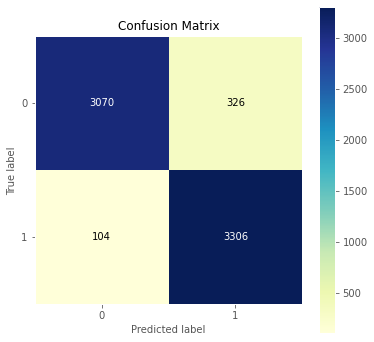

In [ ]:
# graficamos matriz de confusion con 'Y testing' y 'Y_prediccion_knn'
skplt.metrics.plot_confusion_matrix(y_test_2, y_pred_knn_2, figsize=(6,6), cmap= 'YlGnBu');

print('Accuracy:', accuracy_score(y_test_2, y_pred_knn_2))
print('ROC AUC Score:', roc_auc_score(y_test_2, y_pred_prob_knn_2))

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test_2, y_pred_knn_2)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3396
           1       0.91      0.97      0.94      3410

    accuracy                           0.94      6806
   macro avg       0.94      0.94      0.94      6806
weighted avg       0.94      0.94      0.94      6806



Para N Vecinos y el Feature Engineering II obtuvimos un 93% de precisión, un 1% mas que para el caso del Feature Engineering I, adicionalmente para el parametro ROC AUC Score se obtuvo un 98%, 2% adicional que para el primer caso, lo cual implica una mejora en la eficiencia de clasificación de nuestro modelo. 

###Random Search K NVecinos

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_neighbors = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
weights = ['uniform', 'distance']
# Maximum number of levels in tree
leaf_size = [int(x) for x in np.linspace(2, 14, num = 11)]
leaf_size.append(None)
# Minimum number of samples required to split a node
n_jobs = [1, -1]
# Minimum number of samples required at each leaf node
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

n_estimators = [5, 50, 100]
max_features = ['distance', 'uniform']
[1,2,5]

# Create the random grid
random_grid = {'n_neighbors': n_estimators,
               'weights': max_features,
               'leaf_size': max_depth,
               'n_jobs': min_samples_split,
               'algorithm': min_samples_leaf}
print(random_grid)

NameError: ignored

In [ ]:
random_params_2 = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

print(random_params_2)

{'n_neighbors': [5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']}


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning:

The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.



Optimal hyperparameter combination: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}

Mean cross-validated training accuracy score: 0.946734259055176
Test accuracy: 0.95
Execution time of Random Search (in Seconds): 80.28037357330322



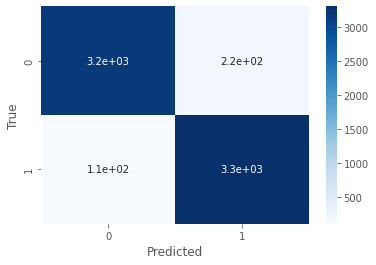

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier #Importamos libreria para el uso del algoritmo KNN
vecinos_2 = KNeighborsClassifier() #Instanciamos el modelo

import time
start = time.time()

#params = {
 #   'n_neighbors' : [5,50,100],
  #  'weights': ['distance', 'uniform'],
   # 'algorithm': ['ball_tree', 'brute_force', 'auto'],
    #'leaf_size':[1,2,5],
    #'n_jobs':[1,-1]
#}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(vecinos_2, param_distributions=random_params_2,
                        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rs.fit(X_train_2, y_train_2)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train_2, y_train_2)
y_pred = rs.best_estimator_.predict(X_test_2) # Predictions
y_true = y_test_2 # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

Con Random Search podemos encontrar los mejores hiperparametros para el algoritmo NVecinos en 80 segundos, mientras para Grid Search en 224 segundos, mostrando una mejora clara en el procesamiento y tiempo de ejecución. 

##Random Forest Clasificación 

Execution time of Random Search (in Seconds): 1.3455791473388672
Accuracy: 0.8564501910079342
ROC AUC Score: 0.9211961458883835


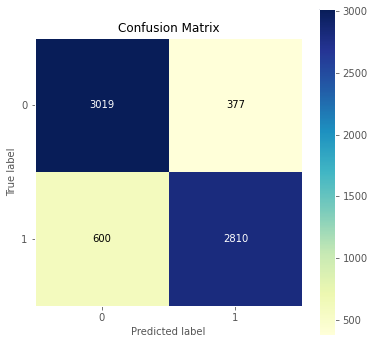

In [ ]:
from sklearn.ensemble import RandomForestClassifier

import time
start = time.time()

#Pasamos los mejores parametros seleccionados por GridSearchCV a la funsión Random Forest
rf_2 = RandomForestClassifier(n_estimators=50, class_weight='balanced', criterion='gini', max_leaf_nodes=20, min_samples_split=2, n_jobs=1) # asigno a rf el algoritmo de RandomForestClassifier
rf_2.fit(X_train_2,y_train_2)  # entreno el modelo rf con las variables en X_train y la variable target en Y_train
y_pred_rf_2 = rf_2.predict(X_test_2) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_rf_2 = rf_2.predict_proba(X_test_2)[:, 1]

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)

skplt.metrics.plot_confusion_matrix(y_test_2, y_pred_rf_2, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test_2, y_pred_rf_2))
print('ROC AUC Score:', roc_auc_score(y_test_2, y_pred_prob_rf_2))


In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test_2, y_pred_rf_2)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      3396
           1       0.87      0.84      0.85      3410

    accuracy                           0.85      6806
   macro avg       0.85      0.85      0.85      6806
weighted avg       0.85      0.85      0.85      6806



Para el algoritmo de Random Forest Feature Engineering obtuvimos un 85% de precisión, 2% mas que para el caso de Feature Engineering I, adicionalmente para el parametro ROC AUC Score se obtuvo un 92%, un 1% mas que para el caso de Feature Engineering I, lo que implica una mejora en los parametros para el segundo caso de Feature Engineering. 

###Ramdon Search Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Optimal hyperparameter combination: {'n_estimators': 18, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}

Mean cross-validated training accuracy score: 0.9614649915509514
Test accuracy: 0.96
Execution time of Random Search (in Seconds): 90.60247611999512



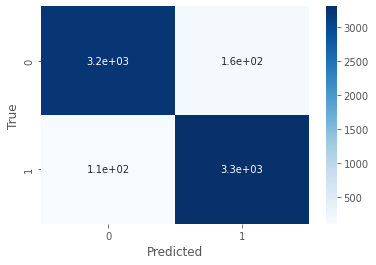

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
rf_2 = RandomForestClassifier(random_state = 42)

import time
start = time.time()

#params = {
 #   'n_neighbors' : [5,50,100],
  #  'weights': ['distance', 'uniform'],
   # 'algorithm': ['ball_tree', 'brute_force', 'auto'],
    #'leaf_size':[1,2,5],
    #'n_jobs':[1,-1]
#}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(rf_2, param_distributions=random_grid,
                        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rs.fit(X_train_2, y_train_2)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train_2, y_train_2)
y_pred = rs.best_estimator_.predict(X_test_2) # Predictions
y_true = y_test_2 # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

Test accuracy: 0.96
Execution time of Random Search (in Seconds): 542.4196834564209



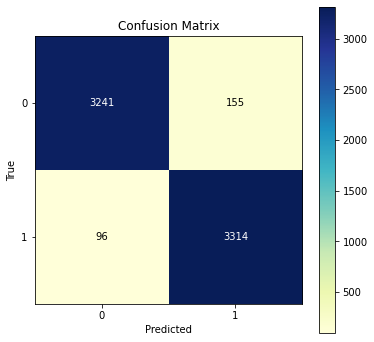

In [ ]:
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(cf_matrix, annot=True, cmap='Blues')
skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(6,6), cmap= 'YlGnBu');
plt.xlabel('Predicted')
plt.ylabel('True')

print('Execution time of Random Search (in Seconds):', diff)
print()

Para el caso de Grid Search podemos observar que el tiempo de ejecución es de 147 segundos, y el accuracy de 85%, para el caso de Ramdon Search tenemos un tiempo de ejecución de 90 segundo y un accuracy de 96%. Podemos observar que el tiempo de ejecución se reduce casi a la mitad y mejora considerablemente el accuracy, debido a que se hace un mejor ajuste de los hiperparametros. 

##Decision Tree

Accuracy: 0.8241257713781958
ROC AUC Score: 0.9047194992210951


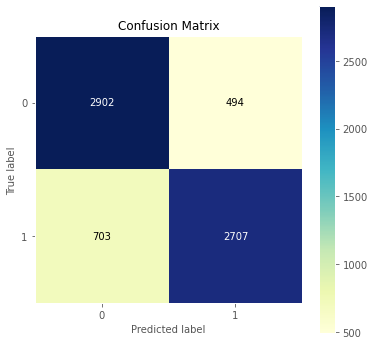

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc_2 = DecisionTreeClassifier(class_weight= 'balanced',
 criterion= 'entropy',
 max_features= 'auto',
 max_leaf_nodes= 50,
 min_samples_split= 20,
 splitter= 'best') # creamos el modelo dtc con el algoritmo de DecisionTreeClassifier
dtc_2.fit(X_train_2,y_train_2)
y_pred_dtc_2 = dtc_2.predict(X_test_2) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_dtc_2 = dtc_2.predict_proba(X_test_2)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test_2, y_pred_dtc_2, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test_2, y_pred_dtc_2))
print('ROC AUC Score:', roc_auc_score(y_test_2, y_pred_prob_dtc_2))

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test_2, y_pred_dtc_2)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      3396
           1       0.85      0.79      0.82      3410

    accuracy                           0.82      6806
   macro avg       0.83      0.82      0.82      6806
weighted avg       0.83      0.82      0.82      6806



In [ ]:
feature_names_2 = X_test_2.columns # obtenemos el nombre de las variables que estan en el dataset de training
feature_names_2

Index(['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'is_profile', 'salary', 'is_locations', 'is_benefits', 'department'],
      dtype='object')

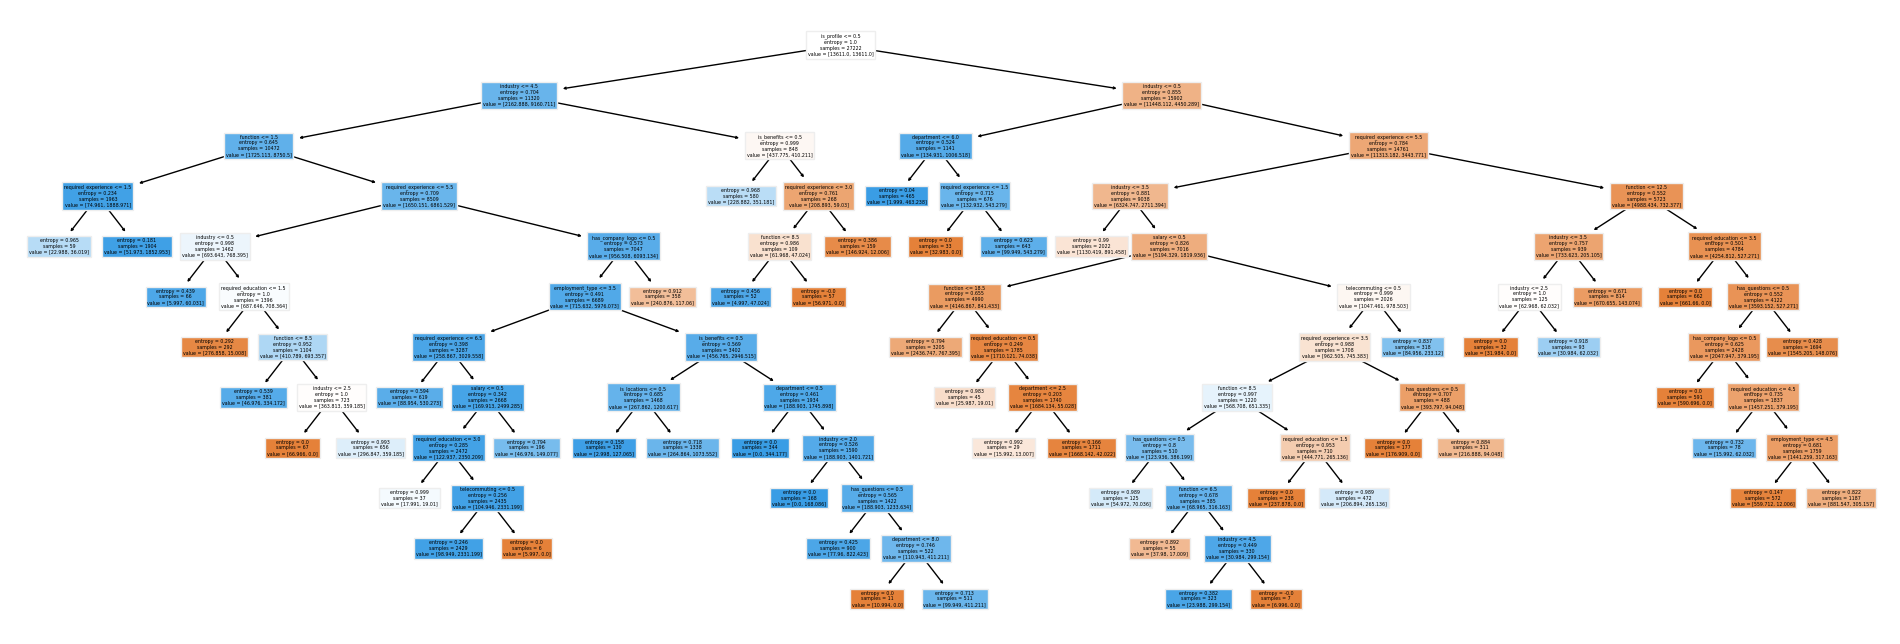

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plot_tree(dtc_2, feature_names=feature_names_2, filled=True) #graficamos el arbol del modelo dtc con los feature names obtenidos
plt.show()

Del Diagrama anterior observamos que la variable con mayor peso es "is_profile", a diferencia del caso del feature engineering I donde el campo de mayor peso era "has_company_logo".

Para el algoritmo de Decision Tree caso II obtuvimos un accuracy de 82%, un 1% menos que caso I un 83%, adicionalmente para el parametro ROC AUC Score se obtuvo un 90% igual que para el caso II, lo cual implica que nuestro modelo es bastante eficiente clasificando los datos de entrada para este algoritmo, sin embargo el mejor algoritmo sigue siendo para el caso II el de N Vecinos, con un ROC AUC Score de 98%.

###Ramdon Search Decision Tree

Ejecutamos la busqueda de los mejores hiperparametros con nuestro dataset categorizado bajo las caracteristicas del segundo analisis, agregando dos variables adicionales. 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got t

Optimal hyperparameter combination: {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 20}

Mean cross-validated training accuracy score: 0.9479100529600218
Test accuracy: 0.95
Execution time of Random Search (in Seconds): 4.8165974617004395



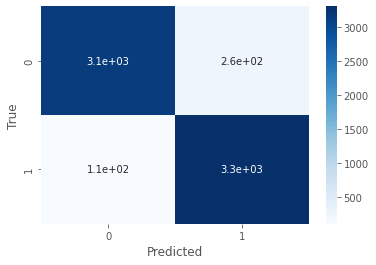

In [ ]:
from sklearn.model_selection import GridSearchCV #Importamos libreria GridSearch
from sklearn.tree import DecisionTreeClassifier #Importamos libreria para el uso del algoritmo Decision Tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
tree_2 = DecisionTreeClassifier(random_state=42) #Instanciamos el modelo
tree_2


#pipeline = Pipeline([
 #   ('tfidf', TfidfVectorizer()),
  #  ('tree_2', DecisionTreeClassifier())
#])

import time
start = time.time()

hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(tree_2, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(X_train_2, y_train_2)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train_2, y_train_2)
y_pred = rs.best_estimator_.predict(X_test_2) # Predictions
y_true = y_test_2 # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

Test accuracy: 0.95
Execution time of Random Search (in Seconds): 5.31315541267395



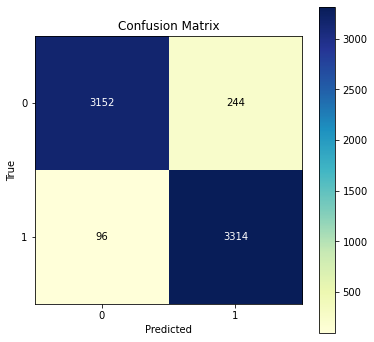

In [ ]:
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(cf_matrix, annot=True, cmap='Blues')
skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(6,6), cmap= 'YlGnBu');
plt.xlabel('Predicted')
plt.ylabel('True')

print('Execution time of Random Search (in Seconds):', diff)
print()

Para el caso de decision tree el tiempo de ejecución de Random Search es de 5.3 segundos, mientras para Grid Search es de 4.93 segundos, para este caso no se presenta una mejora considerablemente en el tiempo de procesamiento y selección de los mejores hiperparametros.

##Random Search vs Grid Search

In [ ]:
import pandas as pd #importamos libreria pandas
  
# Incializamos variables
data_compare_search = {'Modelo' : ['KNN', 'Random Forest', 'Decision Tree'],
        'Grid Search': [224, 147, 4.95],
        'Random Search': [80, 90, 5.3],
        }
  
# Creamos Dataframe
df_compare_search = pd.DataFrame(data_compare_search)
  
# Imprimimos resultado
df_compare_search

,Modelo,Grid Search,Random Search
0,KNN,224.00,80.0
1,Random Forest,147.00,90.0
2,Decision Tree,4.95,5.3


## **Consideraciones Finales de los Modelos de Clasificación**

Para nuestro dataset se evaluaron tres modelos de aprendizaje el KNN (n vecinos cercanos), Random Forest y el Decision Tree. De los tres modelos evaluados podemos determinar en una primera fase que el mejor es el Decision Tree, debido a que se obtiene un 78% de accuracy, mientras los dos primeros logran un accuracy del 87% y 93% respectivamente, haciendo sospechar la existencia de posibles cesgos. Sin embargo vale acotar que con el ajuste de categorias de la variable industry logramos aumentar el accuracy del Decision Trees a 78% y reducir el de KNN y Random Forest a 87% y 93% respectivamente, lo que nos lleva a determinar que el proceso de ajustes de categorias mejora sustancialmente el accuracy de nuestros modelos. En los proximos pasos se debe continuar ajustando las variables numericas con mas de 10 categorias.

En la segunda fase de nuestro analisis, se agrego la variables department y company_profile al estudio de nuestro modelo de aprendizaje. Con esto se pudo obtener una mejora en los parametros definidos, principalmente el de precision, donde para el modelo KNN aumento de 91 a 94%, para Random Forest de 83 a 87% y para Desicion Tree de 83 a 85%, lo cual podemos determinar que las variables department y company_profile tienen un influencia significativa en la mejora de nuestros modelo de aprendizaje. 

In [ ]:
import pandas as pd #importamos libreria pandas
  
# Incializamos variables
data_compare = {'Modelo' : ['KNN I', 'KNN II', 'Random Forest I', 'Random Forest II', 'Decision Tree I', 'Decision Tree II'],
        'ROC AUC Score': [0.97, 0.98, 0.91, 0.92, 0.90, 0.89],
        'accuracy': [0.91, 0.94, 0.83, 0.87, 0.83, 0.85],
        'recall': [0.93, 0.98, 0.82, 0.86, 0.86,0.89],
        'f1-score': [0.89, 0.90, 0.85, 0.88, 0.78, 0.80],
        'support': [0.91, 0.94, 0.84, 0.87, 0.82, 0.84], 
        }
  
# Creamos Dataframe
df_compare = pd.DataFrame(data_compare)
  
# Imprimimos resultado
df_compare

,Modelo,ROC AUC Score,accuracy,recall,f1-score,support
0,KNN I,0.97,0.91,0.93,0.89,0.91
1,KNN II,0.98,0.94,0.98,0.90,0.94
2,Random Forest I,0.91,0.83,0.82,0.85,0.84
3,Random Forest II,0.92,0.87,0.86,0.88,0.87
4,Decision Tree I,0.90,0.83,0.86,0.78,0.82
5,Decision Tree II,0.89,0.85,0.89,0.80,0.84


#BIAS - VARIANCE

En esta ultima sección vamos a determinar el valor de BIAS y la varianza de nuestro modelo de aprendizaje, acorde a los tres algoritmos selccionados: 

1. Decision Tree.
2. Ramdon Forest.
3. N Vecinos Cercanos.

Vale acotar, que el dataset usado es el df_feature2, debido que otorga mejores valores en los parametros de ROC AUC y precision. 

In [ ]:
#!pip install mlxtend
#%pip install mlxtend --upgrade
#from mlxtend.evaluate import bias_variance_decomp
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from mlxtend.data import iris_data
#from sklearn.model_selection import train_test_split

In [ ]:
df_feature_2.head(4) #revisamos nuestro dataset

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,is_profile,salary,is_locations,is_benefits,department
0,0,1,0,2,4,13,4,22,0,1,0,1,0,7
1,0,1,0,1,6,13,3,7,0,1,0,1,1,9
2,0,1,0,5,7,13,4,37,0,1,0,1,0,9
3,0,1,0,1,5,1,5,31,0,1,0,1,1,10


In [ ]:
pip install mlxtend --upgrade --no-deps #instalamos la libreria mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
data_bias = df_feature_2.values #Seleccionamos nuestros datos de entrenamiento y testeo
X, y = data_bias[:, :-1], data_bias[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)

##Decision Tree

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


tree = DecisionTreeClassifier(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.163
Average bias: 0.138
Average variance: 0.072


## KNN (N Vecinos Cercanos)

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


vecinos = KNeighborsClassifier(n_neighbors = 50, weights='distance', algorithm='auto', leaf_size=2, n_jobs=1)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        vecinos, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.142
Average bias: 0.136
Average variance: 0.039


##Random Forest

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


random = RandomForestClassifier(random_state = 42)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        random, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.140
Average bias: 0.135
Average variance: 0.037


In [ ]:
import pandas as pd #importamos libreria pandas
  
# Incializamos variables
data_compare_bias = {'Modelo' : ['KNN', 'Random Forest', 'Decision Tree'],
        'BIAS': [0.136, 0.135, .138],
        'Varianza': [0.039, 0.037, 0.072],
        }
  
# Creamos Dataframe
df_compare_bias = pd.DataFrame(data_compare_bias)
  
# Imprimimos resultado
df_compare_bias

,Modelo,BIAS,Varianza
0,KNN,0.136,0.039
1,Random Forest,0.135,0.037
2,Decision Tree,0.138,0.072


Podemos observar que para el caso del algoritmo Decision Tree el bias es de 0.13 y una varianza de 0.072.

Para el caso de N Vecinos Cercanos obtuvimos un bias 0.13 y una varianza de 0.039, y por ultimo para el algoritmo de Random Forest se obtuvo bias de 0.13 y varianza de 0.037. 

Lo cual implica que la variabilidad de nuestro modelo para varios dataset de entrenamientos y el margen de error entre los valores predichos y reales son bajos, sin embargo el algoritmo que presenta un bias y una varianza mas baja es el Random Forest, esto no implica que sea el mejor modelo, se debe encontrar un balance entre estos valores debido que una varianza y un bias muy bajos podria indicar una caso de overfitting. Dado esto se eligiria preliminarmente el algoritmo Decision Tree para el diseño y despliegue de nuestro modelo de aprendizaje. 

#NUBE DE PROFESIONES

Por ulitmo se muestra una nube de palabras referentes a las profesiones que mas se pueden encontrar en nuestro dataset de estudio. 

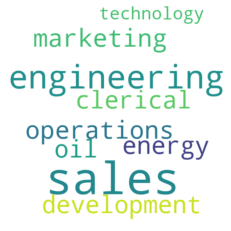

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

texto = " sales marketing engineering operations development engineering  energy clerical oil technology  sales"

wc = WordCloud(width = 600, height = 600, background_color = "white")
wc.generate(texto)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

plt.show()